In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
from IPython.display import YouTubeVideo

# Ósmosis inversa

La ósmosis inversa es un proceso unitario que permite purificar el agua mediante una membrana semipermeable que separa las sustancias disueltas del agua. Para lograr esto, se aplica una presión mayor que la presión osmótica en el lado más concentrado, de modo que el agua fluye hacia el lado menos concentrado, dejando atrás las impurezas.

Este proceso también se emplea para desalinizar el agua de mar, suavizar el agua dura ($Ca^{2+}$ y $Mg^{2+}$), eliminar contaminantes orgánicos y específicos del agua.

In [3]:
HowDoesReverseOsmosisWork = YouTubeVideo("aVdWqbpbv_Y")

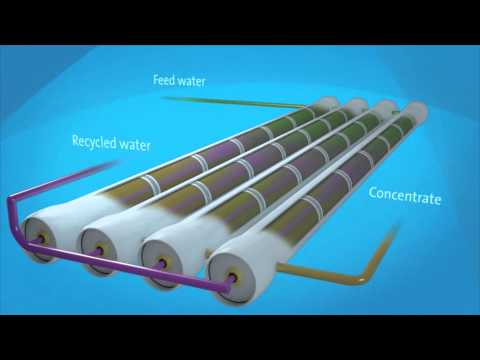

In [4]:
display(HowDoesReverseOsmosisWork)

In [5]:
ReverseOsmosisMembraneOperation = YouTubeVideo("jOYZWPhjUI4")

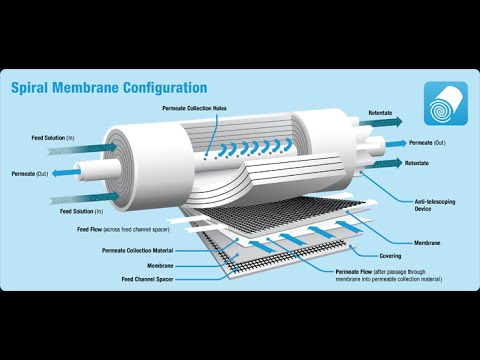

In [6]:
display(ReverseOsmosisMembraneOperation)

# Presión osmótica $\pi$

La ósmosis es un fenómeno físico que ocurre cuando dos soluciones con diferente concentración de solutos se separan por una membrana semipermeable, que solo permite el paso del solvente, generalmente el agua. El solvente se mueve desde la solución menos concentrada (hipotónica) hacia la más concentrada (hipertónica) hasta que se igualan las concentraciones. La ósmosis es un proceso de difusión pasiva, es decir, que no requiere energía.

Ecuación de **Van't Hoff**

$
\pi = v_i * R * C_i * T
$

Donde,

$\pi$: es la presión osmótica en Pascales,<br>
$R$: es la constante universal de los gases en $\frac{m^3 * Pa}{mol * K}$,<br>
$T$: es la temperatura absoluta en $K$,<br>
$C_i$: es la concentración molar del soluto en $\frac{mol}{m^3}$,<br>
$v_i$: es el número de iones disociados

En el caso de $v_i$, el soluto puede formar iones o moléculas más grandes al disolverse, lo que altera el número de partículas en la solución.

Por ejemplo, para una solución diluida de cloruro de sodio ($NaCl$), que se disocia completamente en iones $Na^{+}$ y $Cl^{-}$, el factor de Van't Hoff ($v_i$) es $2$, ya que cada mol de $NaCl$ produce dos moles de iones. Para una solución diluida de glucosa ($C_6H_{12}O_6$), que no se disocia ni se asocia en la solución, $v_i$ es $1$, ya que cada mol de glucosa produce un mol de partículas.

Miremos un ejemplo en el que tengamos diferentes concentraciones de una solución de sal ($NaCl$) y diferentes temperaturas. Evaluemos el efecto de estas dos variables en $\pi$

In [7]:
Csal = np.linspace(0.01,10, 1000) # en mol/m3

In [8]:
Temp = np.linspace(273,300,10) # en Kelvin

In [9]:
R = 8.3145 #m3*Pa/(K mol)

In [10]:
vsal = 2

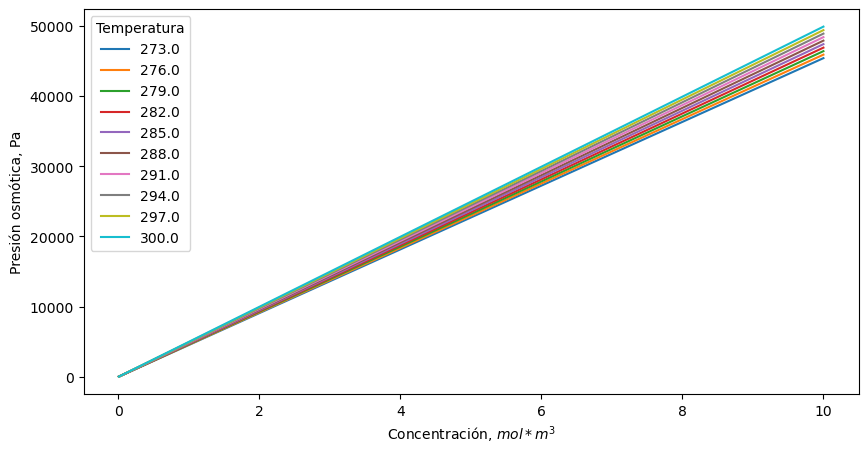

In [11]:
plt.figure(figsize=(10,5))
for i in Temp:
    presionO = vsal*R*Csal*i
    plt.plot(Csal,presionO, label=i)
    plt.legend(title="Temperatura")
    plt.xlabel("Concentración, $mol*m^3$")
    plt.ylabel("Presión osmótica, Pa")

# Modelos de transporte en la membrana

Para una membrana densa, el modelo de transporte más popular es el modelo de “solución/difusión”, en el que la solución se disuelve en la interfaz de la membrana y luego se difunden a través de la membrana a lo largo del gradiente de concentración. La separación se produce debido a las diferencias en solubilidad y difusividad de los permeados.

La diferencia de potencial ($\Delta \mu_i$) se define como:

$
\Delta \mu_i = R*T*ln(\Delta a_i) + V_i *\Delta P
$

Donde,

$\mu$: es el potencial químico en $\frac{J}{mol}$, <br>
$a_i$: es la actividad del soluto o solvente, <br>
$V_i$: es el volumen molar en $\frac{m^3}{mol}$, <br>
$\Delta P$: es la diferencia de potencial a través de la membrana en $Pa$, <br>

En este caso $a_i$ representa la relación de las especies iónicas de la solución respecto a su fuerza iónica ($I$).

$
a_i = C_i * \gamma_i
$

Donde $\gamma_i$ representa el coeficiente de actividad

$
log \gamma = \frac{-0.51 * z^{2} * \sqrt{I}}{1+3.3* \alpha * \sqrt{I}}
$

Donde,

$z$, es la carga del ión,<br>
$\alpha$, es el diámetro efectivo del ión hidratado, en nm <br>
$I$, es la fuerza iónica, en M <br>
$c_i$, es la concentración del ión, en M

$
I = \frac{1}{2}\sum_{1}^{n}c_i*z_i^2
$

<table class="mt-responsive-table">
    <caption><a name="table6.9.1"></a>Tabla 35.7.1
. Diámetros efectivos (<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="50" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="1.448ex" height="1.025ex" role="img" focusable="false" viewBox="0 -442 640 453" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.025ex;"><defs><path id="MJX-51-TEX-I-1D6FC" d="M34 156Q34 270 120 356T309 442Q379 442 421 402T478 304Q484 275 485 237V208Q534 282 560 374Q564 388 566 390T582 393Q603 393 603 385Q603 376 594 346T558 261T497 161L486 147L487 123Q489 67 495 47T514 26Q528 28 540 37T557 60Q559 67 562 68T577 70Q597 70 597 62Q597 56 591 43Q579 19 556 5T512 -10H505Q438 -10 414 62L411 69L400 61Q390 53 370 41T325 18T267 -2T203 -11Q124 -11 79 39T34 156ZM208 26Q257 26 306 47T379 90L403 112Q401 255 396 290Q382 405 304 405Q235 405 183 332Q156 292 139 224T121 120Q121 71 146 49T208 26Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="mi"><use xlink:href="#MJX-51-TEX-I-1D6FC"></use></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-51-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x3B1;</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-659" style="width: 0.704em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.645em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.58em, 1000.59em, 2.398em, -999.997em); top: -2.217em; left: 0em;"><span class="mrow" id="MathJax-Span-660"><span class="mi" id="MathJax-Span-661" style="font-family: MathJax_Math-italic;">α</span></span><span style="display: inline-block; width: 0px; height: 2.223em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 0.628em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>α</mi></math></span></span><script type="math/mml" id="MathJax-Element-51"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>α</mi></math></script></mjx-assistive-mml></mjx-container></span>) para iones seleccionados</caption>
    <thead>
        <tr>
            <th class="mt-align-center" scope="col">ion</th>
            <th class="mt-align-center" scope="col">diámetro efectivo (nm)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;">H <sub>3</sub> O <sup>+</sup></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">0.9</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;">Li <sup>+</sup></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">0.6</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;">Na <sup>+</sup><span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="51" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="3.935ex" height="2.57ex" role="img" focusable="false" viewBox="0 -844.3 1739.1 1136" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.66ex;"><defs><path id="MJX-52-TEX-N-49" d="M328 0Q307 3 180 3T32 0H21V46H43Q92 46 106 49T126 60Q128 63 128 342Q128 620 126 623Q122 628 118 630T96 635T43 637H21V683H32Q53 680 180 680T328 683H339V637H317Q268 637 254 634T234 623Q232 620 232 342Q232 63 234 60Q238 55 242 53T264 48T317 46H339V0H328Z"></path><path id="MJX-52-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-52-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-52-TEX-N-33" d="M127 463Q100 463 85 480T69 524Q69 579 117 622T233 665Q268 665 277 664Q351 652 390 611T430 522Q430 470 396 421T302 350L299 348Q299 347 308 345T337 336T375 315Q457 262 457 175Q457 96 395 37T238 -22Q158 -22 100 21T42 130Q42 158 60 175T105 193Q133 193 151 175T169 130Q169 119 166 110T159 94T148 82T136 74T126 70T118 67L114 66Q165 21 238 21Q293 21 321 74Q338 107 338 175V195Q338 290 274 322Q259 328 213 329L171 330L168 332Q166 335 166 348Q166 366 174 366Q202 366 232 371Q266 376 294 413T322 525V533Q322 590 287 612Q265 626 240 626Q208 626 181 615T143 592T132 580H135Q138 579 143 578T153 573T165 566T175 555T183 540T186 520Q186 498 172 481T127 463Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-52-TEX-N-49"></use><use xlink:href="#MJX-52-TEX-N-4F" transform="translate(361, 0)"></use></g><g data-mml-node="mo" transform="translate(1139, 432.1) scale(0.707)"><use xlink:href="#MJX-52-TEX-N-2212"></use></g><g data-mml-node="mn" transform="translate(1139, -276.2) scale(0.707)"><use xlink:href="#MJX-52-TEX-N-33"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-52-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>IO</mtext><mn>3</mn><mo>&amp;#x2212;</mo></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-662" style="width: 1.872em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.755em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.171em, 1001.75em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-663"><span class="msubsup" id="MathJax-Span-664"><span style="display: inline-block; position: relative; width: 1.755em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1001.11em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-665" style="font-family: MathJax_Main;">IO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.64em, 4.209em, -999.997em); top: -4.378em; left: 1.113em;"><span class="mo" id="MathJax-Span-666" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 1.113em;"><span class="mn" id="MathJax-Span-667" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.316em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>IO</mtext><mn>3</mn><mo>−</mo></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-52"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>IO</mtext><mn>3</mn><mo>−</mo></msubsup></math></script></mjx-assistive-mml></mjx-container></span>,<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="52" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="6.073ex" height="2.57ex" role="img" focusable="false" viewBox="0 -844.3 2684.1 1136" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.66ex;"><defs><path id="MJX-53-TEX-N-48" d="M128 622Q121 629 117 631T101 634T58 637H25V683H36Q57 680 180 680Q315 680 324 683H335V637H302Q262 636 251 634T233 622L232 500V378H517V622Q510 629 506 631T490 634T447 637H414V683H425Q446 680 569 680Q704 680 713 683H724V637H691Q651 636 640 634T622 622V61Q628 51 639 49T691 46H724V0H713Q692 3 569 3Q434 3 425 0H414V46H447Q489 47 498 49T517 61V332H232V197L233 61Q239 51 250 49T302 46H335V0H324Q303 3 180 3Q45 3 36 0H25V46H58Q100 47 109 49T128 61V622Z"></path><path id="MJX-53-TEX-N-53" d="M55 507Q55 590 112 647T243 704H257Q342 704 405 641L426 672Q431 679 436 687T446 700L449 704Q450 704 453 704T459 705H463Q466 705 472 699V462L466 456H448Q437 456 435 459T430 479Q413 605 329 646Q292 662 254 662Q201 662 168 626T135 542Q135 508 152 480T200 435Q210 431 286 412T370 389Q427 367 463 314T500 191Q500 110 448 45T301 -21Q245 -21 201 -4T140 27L122 41Q118 36 107 21T87 -7T78 -21Q76 -22 68 -22H64Q61 -22 55 -16V101Q55 220 56 222Q58 227 76 227H89Q95 221 95 214Q95 182 105 151T139 90T205 42T305 24Q352 24 386 62T420 155Q420 198 398 233T340 281Q284 295 266 300Q261 301 239 306T206 314T174 325T141 343T112 367T85 402Q55 451 55 507Z"></path><path id="MJX-53-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-53-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-53-TEX-N-33" d="M127 463Q100 463 85 480T69 524Q69 579 117 622T233 665Q268 665 277 664Q351 652 390 611T430 522Q430 470 396 421T302 350L299 348Q299 347 308 345T337 336T375 315Q457 262 457 175Q457 96 395 37T238 -22Q158 -22 100 21T42 130Q42 158 60 175T105 193Q133 193 151 175T169 130Q169 119 166 110T159 94T148 82T136 74T126 70T118 67L114 66Q165 21 238 21Q293 21 321 74Q338 107 338 175V195Q338 290 274 322Q259 328 213 329L171 330L168 332Q166 335 166 348Q166 366 174 366Q202 366 232 371Q266 376 294 413T322 525V533Q322 590 287 612Q265 626 240 626Q208 626 181 615T143 592T132 580H135Q138 579 143 578T153 573T165 566T175 555T183 540T186 520Q186 498 172 481T127 463Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-53-TEX-N-48"></use><use xlink:href="#MJX-53-TEX-N-53" transform="translate(750, 0)"></use><use xlink:href="#MJX-53-TEX-N-4F" transform="translate(1306, 0)"></use></g><g data-mml-node="mo" transform="translate(2084, 432.1) scale(0.707)"><use xlink:href="#MJX-53-TEX-N-2212"></use></g><g data-mml-node="mn" transform="translate(2084, -276.2) scale(0.707)"><use xlink:href="#MJX-53-TEX-N-33"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-53-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>HSO</mtext><mn>3</mn><mo>&amp;#x2212;</mo></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-668" style="width: 2.865em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.69em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.171em, 1002.69em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-669"><span class="msubsup" id="MathJax-Span-670"><span style="display: inline-block; position: relative; width: 2.69em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1002.05em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-671" style="font-family: MathJax_Main;">HSO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.64em, 4.209em, -999.997em); top: -4.378em; left: 2.106em;"><span class="mo" id="MathJax-Span-672" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 2.106em;"><span class="mn" id="MathJax-Span-673" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.316em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>HSO</mtext><mn>3</mn><mo>−</mo></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-53"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>HSO</mtext><mn>3</mn><mo>−</mo></msubsup></math></script></mjx-assistive-mml></mjx-container></span>,<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="53" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="6.448ex" height="2.57ex" role="img" focusable="false" viewBox="0 -844.3 2850.1 1136" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.66ex;"><defs><path id="MJX-54-TEX-N-48" d="M128 622Q121 629 117 631T101 634T58 637H25V683H36Q57 680 180 680Q315 680 324 683H335V637H302Q262 636 251 634T233 622L232 500V378H517V622Q510 629 506 631T490 634T447 637H414V683H425Q446 680 569 680Q704 680 713 683H724V637H691Q651 636 640 634T622 622V61Q628 51 639 49T691 46H724V0H713Q692 3 569 3Q434 3 425 0H414V46H447Q489 47 498 49T517 61V332H232V197L233 61Q239 51 250 49T302 46H335V0H324Q303 3 180 3Q45 3 36 0H25V46H58Q100 47 109 49T128 61V622Z"></path><path id="MJX-54-TEX-N-43" d="M56 342Q56 428 89 500T174 615T283 681T391 705Q394 705 400 705T408 704Q499 704 569 636L582 624L612 663Q639 700 643 704Q644 704 647 704T653 705H657Q660 705 666 699V419L660 413H626Q620 419 619 430Q610 512 571 572T476 651Q457 658 426 658Q322 658 252 588Q173 509 173 342Q173 221 211 151Q232 111 263 84T328 45T384 29T428 24Q517 24 571 93T626 244Q626 251 632 257H660L666 251V236Q661 133 590 56T403 -21Q262 -21 159 83T56 342Z"></path><path id="MJX-54-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-54-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-54-TEX-N-33" d="M127 463Q100 463 85 480T69 524Q69 579 117 622T233 665Q268 665 277 664Q351 652 390 611T430 522Q430 470 396 421T302 350L299 348Q299 347 308 345T337 336T375 315Q457 262 457 175Q457 96 395 37T238 -22Q158 -22 100 21T42 130Q42 158 60 175T105 193Q133 193 151 175T169 130Q169 119 166 110T159 94T148 82T136 74T126 70T118 67L114 66Q165 21 238 21Q293 21 321 74Q338 107 338 175V195Q338 290 274 322Q259 328 213 329L171 330L168 332Q166 335 166 348Q166 366 174 366Q202 366 232 371Q266 376 294 413T322 525V533Q322 590 287 612Q265 626 240 626Q208 626 181 615T143 592T132 580H135Q138 579 143 578T153 573T165 566T175 555T183 540T186 520Q186 498 172 481T127 463Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-54-TEX-N-48"></use><use xlink:href="#MJX-54-TEX-N-43" transform="translate(750, 0)"></use><use xlink:href="#MJX-54-TEX-N-4F" transform="translate(1472, 0)"></use></g><g data-mml-node="mo" transform="translate(2250, 432.1) scale(0.707)"><use xlink:href="#MJX-54-TEX-N-2212"></use></g><g data-mml-node="mn" transform="translate(2250, -276.2) scale(0.707)"><use xlink:href="#MJX-54-TEX-N-33"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-54-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>HCO</mtext><mn>3</mn><mo>&amp;#x2212;</mo></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-674" style="width: 3.099em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.865em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.171em, 1002.87em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-675"><span class="msubsup" id="MathJax-Span-676"><span style="display: inline-block; position: relative; width: 2.865em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1002.22em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-677" style="font-family: MathJax_Main;">HCO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.64em, 4.209em, -999.997em); top: -4.378em; left: 2.281em;"><span class="mo" id="MathJax-Span-678" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 2.281em;"><span class="mn" id="MathJax-Span-679" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.316em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>HCO</mtext><mn>3</mn><mo>−</mo></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-54"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>HCO</mtext><mn>3</mn><mo>−</mo></msubsup></math></script></mjx-assistive-mml></mjx-container></span>,<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="54" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="7.269ex" height="2.554ex" role="img" focusable="false" viewBox="0 -844.3 3212.7 1128.9" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.644ex;"><defs><path id="MJX-55-TEX-N-48" d="M128 622Q121 629 117 631T101 634T58 637H25V683H36Q57 680 180 680Q315 680 324 683H335V637H302Q262 636 251 634T233 622L232 500V378H517V622Q510 629 506 631T490 634T447 637H414V683H425Q446 680 569 680Q704 680 713 683H724V637H691Q651 636 640 634T622 622V61Q628 51 639 49T691 46H724V0H713Q692 3 569 3Q434 3 425 0H414V46H447Q489 47 498 49T517 61V332H232V197L233 61Q239 51 250 49T302 46H335V0H324Q303 3 180 3Q45 3 36 0H25V46H58Q100 47 109 49T128 61V622Z"></path><path id="MJX-55-TEX-N-32" d="M109 429Q82 429 66 447T50 491Q50 562 103 614T235 666Q326 666 387 610T449 465Q449 422 429 383T381 315T301 241Q265 210 201 149L142 93L218 92Q375 92 385 97Q392 99 409 186V189H449V186Q448 183 436 95T421 3V0H50V19V31Q50 38 56 46T86 81Q115 113 136 137Q145 147 170 174T204 211T233 244T261 278T284 308T305 340T320 369T333 401T340 431T343 464Q343 527 309 573T212 619Q179 619 154 602T119 569T109 550Q109 549 114 549Q132 549 151 535T170 489Q170 464 154 447T109 429Z"></path><path id="MJX-55-TEX-N-50" d="M130 622Q123 629 119 631T103 634T60 637H27V683H214Q237 683 276 683T331 684Q419 684 471 671T567 616Q624 563 624 489Q624 421 573 372T451 307Q429 302 328 301H234V181Q234 62 237 58Q245 47 304 46H337V0H326Q305 3 182 3Q47 3 38 0H27V46H60Q102 47 111 49T130 61V622ZM507 488Q507 514 506 528T500 564T483 597T450 620T397 635Q385 637 307 637H286Q237 637 234 628Q231 624 231 483V342H302H339Q390 342 423 349T481 382Q507 411 507 488Z"></path><path id="MJX-55-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-55-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-55-TEX-N-34" d="M462 0Q444 3 333 3Q217 3 199 0H190V46H221Q241 46 248 46T265 48T279 53T286 61Q287 63 287 115V165H28V211L179 442Q332 674 334 675Q336 677 355 677H373L379 671V211H471V165H379V114Q379 73 379 66T385 54Q393 47 442 46H471V0H462ZM293 211V545L74 212L183 211H293Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msub"><g data-mml-node="mtext"><use xlink:href="#MJX-55-TEX-N-48"></use></g><g data-mml-node="mn" transform="translate(750, -150) scale(0.707)"><use xlink:href="#MJX-55-TEX-N-32"></use></g></g><g data-mml-node="msubsup" transform="translate(1153.6, 0)"><g data-mml-node="mtext"><use xlink:href="#MJX-55-TEX-N-50"></use><use xlink:href="#MJX-55-TEX-N-4F" transform="translate(681, 0)"></use></g><g data-mml-node="mo" transform="translate(1459, 432.1) scale(0.707)"><use xlink:href="#MJX-55-TEX-N-2212"></use></g><g data-mml-node="mn" transform="translate(1459, -284.6) scale(0.707)"><use xlink:href="#MJX-55-TEX-N-34"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-55-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mtext>H</mtext><mn>2</mn></msub><msubsup><mtext>PO</mtext><mn>4</mn><mo>&amp;#x2212;</mo></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-680" style="width: 3.508em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.274em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.171em, 1003.27em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-681"><span class="msub" id="MathJax-Span-682"><span style="display: inline-block; position: relative; width: 1.171em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1000.7em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-683" style="font-family: MathJax_Main;">H</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; top: -3.794em; left: 0.762em;"><span class="mn" id="MathJax-Span-684" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-685"><span style="display: inline-block; position: relative; width: 2.106em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1001.4em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-686" style="font-family: MathJax_Main;">PO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.64em, 4.209em, -999.997em); top: -4.378em; left: 1.463em;"><span class="mo" id="MathJax-Span-687" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 1.463em;"><span class="mn" id="MathJax-Span-688" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.316em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mtext>H</mtext><mn>2</mn></msub><msubsup><mtext>PO</mtext><mn>4</mn><mo>−</mo></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-55"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mtext>H</mtext><mn>2</mn></msub><msubsup><mtext>PO</mtext><mn>4</mn><mo>−</mo></msubsup></math></script></mjx-assistive-mml></mjx-container></span></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">0.45</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;">OH <sup>—</sup>, F <sup>—</sup>, SCN <sup>—</sup>, HS <sup>—</sup><span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="55" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="5.38ex" height="2.57ex" role="img" focusable="false" viewBox="0 -844.3 2378.1 1136" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.66ex;"><defs><path id="MJX-56-TEX-N-43" d="M56 342Q56 428 89 500T174 615T283 681T391 705Q394 705 400 705T408 704Q499 704 569 636L582 624L612 663Q639 700 643 704Q644 704 647 704T653 705H657Q660 705 666 699V419L660 413H626Q620 419 619 430Q610 512 571 572T476 651Q457 658 426 658Q322 658 252 588Q173 509 173 342Q173 221 211 151Q232 111 263 84T328 45T384 29T428 24Q517 24 571 93T626 244Q626 251 632 257H660L666 251V236Q661 133 590 56T403 -21Q262 -21 159 83T56 342Z"></path><path id="MJX-56-TEX-N-6C" d="M42 46H56Q95 46 103 60V68Q103 77 103 91T103 124T104 167T104 217T104 272T104 329Q104 366 104 407T104 482T104 542T103 586T103 603Q100 622 89 628T44 637H26V660Q26 683 28 683L38 684Q48 685 67 686T104 688Q121 689 141 690T171 693T182 694H185V379Q185 62 186 60Q190 52 198 49Q219 46 247 46H263V0H255L232 1Q209 2 183 2T145 3T107 3T57 1L34 0H26V46H42Z"></path><path id="MJX-56-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-56-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-56-TEX-N-33" d="M127 463Q100 463 85 480T69 524Q69 579 117 622T233 665Q268 665 277 664Q351 652 390 611T430 522Q430 470 396 421T302 350L299 348Q299 347 308 345T337 336T375 315Q457 262 457 175Q457 96 395 37T238 -22Q158 -22 100 21T42 130Q42 158 60 175T105 193Q133 193 151 175T169 130Q169 119 166 110T159 94T148 82T136 74T126 70T118 67L114 66Q165 21 238 21Q293 21 321 74Q338 107 338 175V195Q338 290 274 322Q259 328 213 329L171 330L168 332Q166 335 166 348Q166 366 174 366Q202 366 232 371Q266 376 294 413T322 525V533Q322 590 287 612Q265 626 240 626Q208 626 181 615T143 592T132 580H135Q138 579 143 578T153 573T165 566T175 555T183 540T186 520Q186 498 172 481T127 463Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-56-TEX-N-43"></use><use xlink:href="#MJX-56-TEX-N-6C" transform="translate(722, 0)"></use><use xlink:href="#MJX-56-TEX-N-4F" transform="translate(1000, 0)"></use></g><g data-mml-node="mo" transform="translate(1778, 432.1) scale(0.707)"><use xlink:href="#MJX-56-TEX-N-2212"></use></g><g data-mml-node="mn" transform="translate(1778, -276.2) scale(0.707)"><use xlink:href="#MJX-56-TEX-N-33"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-56-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>ClO</mtext><mn>3</mn><mo>&amp;#x2212;</mo></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-689" style="width: 2.573em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.398em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.171em, 1002.4em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-690"><span class="msubsup" id="MathJax-Span-691"><span style="display: inline-block; position: relative; width: 2.398em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1001.7em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-692" style="font-family: MathJax_Main;">ClO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.64em, 4.209em, -999.997em); top: -4.378em; left: 1.755em;"><span class="mo" id="MathJax-Span-693" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 1.755em;"><span class="mn" id="MathJax-Span-694" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.316em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>ClO</mtext><mn>3</mn><mo>−</mo></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-56"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>ClO</mtext><mn>3</mn><mo>−</mo></msubsup></math></script></mjx-assistive-mml></mjx-container></span>,<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="56" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="5.38ex" height="2.554ex" role="img" focusable="false" viewBox="0 -844.3 2378.1 1128.9" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.644ex;"><defs><path id="MJX-57-TEX-N-43" d="M56 342Q56 428 89 500T174 615T283 681T391 705Q394 705 400 705T408 704Q499 704 569 636L582 624L612 663Q639 700 643 704Q644 704 647 704T653 705H657Q660 705 666 699V419L660 413H626Q620 419 619 430Q610 512 571 572T476 651Q457 658 426 658Q322 658 252 588Q173 509 173 342Q173 221 211 151Q232 111 263 84T328 45T384 29T428 24Q517 24 571 93T626 244Q626 251 632 257H660L666 251V236Q661 133 590 56T403 -21Q262 -21 159 83T56 342Z"></path><path id="MJX-57-TEX-N-6C" d="M42 46H56Q95 46 103 60V68Q103 77 103 91T103 124T104 167T104 217T104 272T104 329Q104 366 104 407T104 482T104 542T103 586T103 603Q100 622 89 628T44 637H26V660Q26 683 28 683L38 684Q48 685 67 686T104 688Q121 689 141 690T171 693T182 694H185V379Q185 62 186 60Q190 52 198 49Q219 46 247 46H263V0H255L232 1Q209 2 183 2T145 3T107 3T57 1L34 0H26V46H42Z"></path><path id="MJX-57-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-57-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-57-TEX-N-34" d="M462 0Q444 3 333 3Q217 3 199 0H190V46H221Q241 46 248 46T265 48T279 53T286 61Q287 63 287 115V165H28V211L179 442Q332 674 334 675Q336 677 355 677H373L379 671V211H471V165H379V114Q379 73 379 66T385 54Q393 47 442 46H471V0H462ZM293 211V545L74 212L183 211H293Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-57-TEX-N-43"></use><use xlink:href="#MJX-57-TEX-N-6C" transform="translate(722, 0)"></use><use xlink:href="#MJX-57-TEX-N-4F" transform="translate(1000, 0)"></use></g><g data-mml-node="mo" transform="translate(1778, 432.1) scale(0.707)"><use xlink:href="#MJX-57-TEX-N-2212"></use></g><g data-mml-node="mn" transform="translate(1778, -284.6) scale(0.707)"><use xlink:href="#MJX-57-TEX-N-34"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-57-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>ClO</mtext><mn>4</mn><mo>&amp;#x2212;</mo></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-695" style="width: 2.573em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.398em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.171em, 1002.4em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-696"><span class="msubsup" id="MathJax-Span-697"><span style="display: inline-block; position: relative; width: 2.398em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1001.7em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-698" style="font-family: MathJax_Main;">ClO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.64em, 4.209em, -999.997em); top: -4.378em; left: 1.755em;"><span class="mo" id="MathJax-Span-699" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 1.755em;"><span class="mn" id="MathJax-Span-700" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.316em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>ClO</mtext><mn>4</mn><mo>−</mo></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-57"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>ClO</mtext><mn>4</mn><mo>−</mo></msubsup></math></script></mjx-assistive-mml></mjx-container></span>,<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="57" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="6.451ex" height="2.554ex" role="img" focusable="false" viewBox="0 -844.3 2851.1 1128.9" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.644ex;"><defs><path id="MJX-58-TEX-N-4D" d="M132 622Q125 629 121 631T105 634T62 637H29V683H135Q221 683 232 682T249 675Q250 674 354 398L458 124L562 398Q666 674 668 675Q671 681 683 682T781 683H887V637H854Q814 636 803 634T785 622V61Q791 51 802 49T854 46H887V0H876Q855 3 736 3Q605 3 596 0H585V46H618Q660 47 669 49T688 61V347Q688 424 688 461T688 546T688 613L687 632Q454 14 450 7Q446 1 430 1T410 7Q409 9 292 316L176 624V606Q175 588 175 543T175 463T175 356L176 86Q187 50 261 46H278V0H269Q254 3 154 3Q52 3 37 0H29V46H46Q78 48 98 56T122 69T132 86V622Z"></path><path id="MJX-58-TEX-N-6E" d="M41 46H55Q94 46 102 60V68Q102 77 102 91T102 122T103 161T103 203Q103 234 103 269T102 328V351Q99 370 88 376T43 385H25V408Q25 431 27 431L37 432Q47 433 65 434T102 436Q119 437 138 438T167 441T178 442H181V402Q181 364 182 364T187 369T199 384T218 402T247 421T285 437Q305 442 336 442Q450 438 463 329Q464 322 464 190V104Q464 66 466 59T477 49Q498 46 526 46H542V0H534L510 1Q487 2 460 2T422 3Q319 3 310 0H302V46H318Q379 46 379 62Q380 64 380 200Q379 335 378 343Q372 371 358 385T334 402T308 404Q263 404 229 370Q202 343 195 315T187 232V168V108Q187 78 188 68T191 55T200 49Q221 46 249 46H265V0H257L234 1Q210 2 183 2T145 3Q42 3 33 0H25V46H41Z"></path><path id="MJX-58-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-58-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-58-TEX-N-34" d="M462 0Q444 3 333 3Q217 3 199 0H190V46H221Q241 46 248 46T265 48T279 53T286 61Q287 63 287 115V165H28V211L179 442Q332 674 334 675Q336 677 355 677H373L379 671V211H471V165H379V114Q379 73 379 66T385 54Q393 47 442 46H471V0H462ZM293 211V545L74 212L183 211H293Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-58-TEX-N-4D"></use><use xlink:href="#MJX-58-TEX-N-6E" transform="translate(917, 0)"></use><use xlink:href="#MJX-58-TEX-N-4F" transform="translate(1473, 0)"></use></g><g data-mml-node="mo" transform="translate(2251, 432.1) scale(0.707)"><use xlink:href="#MJX-58-TEX-N-2212"></use></g><g data-mml-node="mn" transform="translate(2251, -284.6) scale(0.707)"><use xlink:href="#MJX-58-TEX-N-34"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-58-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>MnO</mtext><mn>4</mn><mo>&amp;#x2212;</mo></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-701" style="width: 3.099em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.865em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.171em, 1002.87em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-702"><span class="msubsup" id="MathJax-Span-703"><span style="display: inline-block; position: relative; width: 2.865em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1002.22em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-704" style="font-family: MathJax_Main;">MnO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.64em, 4.209em, -999.997em); top: -4.378em; left: 2.281em;"><span class="mo" id="MathJax-Span-705" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 2.281em;"><span class="mn" id="MathJax-Span-706" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.316em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>MnO</mtext><mn>4</mn><mo>−</mo></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-58"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>MnO</mtext><mn>4</mn><mo>−</mo></msubsup></math></script></mjx-assistive-mml></mjx-container></span></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">0.35</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;">K <sup>+</sup>, Cl <sup>—</sup>, Br <sup>—</sup>, I <sup>—</sup>, CN <sup>—</sup><span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="58" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="4.815ex" height="2.537ex" role="img" focusable="false" viewBox="0 -844.3 2128.1 1121.2" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.626ex;"><defs><path id="MJX-59-TEX-N-4E" d="M42 46Q74 48 94 56T118 69T128 86V634H124Q114 637 52 637H25V683H232L235 680Q237 679 322 554T493 303L578 178V598Q572 608 568 613T544 627T492 637H475V683H483Q498 680 600 680Q706 680 715 683H724V637H707Q634 633 622 598L621 302V6L614 0H600Q585 0 582 3T481 150T282 443T171 605V345L172 86Q183 50 257 46H274V0H265Q250 3 150 3Q48 3 33 0H25V46H42Z"></path><path id="MJX-59-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-59-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-59-TEX-N-32" d="M109 429Q82 429 66 447T50 491Q50 562 103 614T235 666Q326 666 387 610T449 465Q449 422 429 383T381 315T301 241Q265 210 201 149L142 93L218 92Q375 92 385 97Q392 99 409 186V189H449V186Q448 183 436 95T421 3V0H50V19V31Q50 38 56 46T86 81Q115 113 136 137Q145 147 170 174T204 211T233 244T261 278T284 308T305 340T320 369T333 401T340 431T343 464Q343 527 309 573T212 619Q179 619 154 602T119 569T109 550Q109 549 114 549Q132 549 151 535T170 489Q170 464 154 447T109 429Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-59-TEX-N-4E"></use><use xlink:href="#MJX-59-TEX-N-4F" transform="translate(750, 0)"></use></g><g data-mml-node="mo" transform="translate(1528, 432.1) scale(0.707)"><use xlink:href="#MJX-59-TEX-N-2212"></use></g><g data-mml-node="mn" transform="translate(1528, -276.9) scale(0.707)"><use xlink:href="#MJX-59-TEX-N-32"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-59-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>NO</mtext><mn>2</mn><mo>&amp;#x2212;</mo></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-707" style="width: 2.339em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.164em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.171em, 1002.16em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-708"><span class="msubsup" id="MathJax-Span-709"><span style="display: inline-block; position: relative; width: 2.164em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1001.46em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-710" style="font-family: MathJax_Main;">NO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.64em, 4.209em, -999.997em); top: -4.378em; left: 1.522em;"><span class="mo" id="MathJax-Span-711" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 1.522em;"><span class="mn" id="MathJax-Span-712" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.316em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>NO</mtext><mn>2</mn><mo>−</mo></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-59"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>NO</mtext><mn>2</mn><mo>−</mo></msubsup></math></script></mjx-assistive-mml></mjx-container></span>,<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="59" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="4.815ex" height="2.57ex" role="img" focusable="false" viewBox="0 -844.3 2128.1 1136" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.66ex;"><defs><path id="MJX-60-TEX-N-4E" d="M42 46Q74 48 94 56T118 69T128 86V634H124Q114 637 52 637H25V683H232L235 680Q237 679 322 554T493 303L578 178V598Q572 608 568 613T544 627T492 637H475V683H483Q498 680 600 680Q706 680 715 683H724V637H707Q634 633 622 598L621 302V6L614 0H600Q585 0 582 3T481 150T282 443T171 605V345L172 86Q183 50 257 46H274V0H265Q250 3 150 3Q48 3 33 0H25V46H42Z"></path><path id="MJX-60-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-60-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-60-TEX-N-33" d="M127 463Q100 463 85 480T69 524Q69 579 117 622T233 665Q268 665 277 664Q351 652 390 611T430 522Q430 470 396 421T302 350L299 348Q299 347 308 345T337 336T375 315Q457 262 457 175Q457 96 395 37T238 -22Q158 -22 100 21T42 130Q42 158 60 175T105 193Q133 193 151 175T169 130Q169 119 166 110T159 94T148 82T136 74T126 70T118 67L114 66Q165 21 238 21Q293 21 321 74Q338 107 338 175V195Q338 290 274 322Q259 328 213 329L171 330L168 332Q166 335 166 348Q166 366 174 366Q202 366 232 371Q266 376 294 413T322 525V533Q322 590 287 612Q265 626 240 626Q208 626 181 615T143 592T132 580H135Q138 579 143 578T153 573T165 566T175 555T183 540T186 520Q186 498 172 481T127 463Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-60-TEX-N-4E"></use><use xlink:href="#MJX-60-TEX-N-4F" transform="translate(750, 0)"></use></g><g data-mml-node="mo" transform="translate(1528, 432.1) scale(0.707)"><use xlink:href="#MJX-60-TEX-N-2212"></use></g><g data-mml-node="mn" transform="translate(1528, -276.2) scale(0.707)"><use xlink:href="#MJX-60-TEX-N-33"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-60-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>NO</mtext><mn>3</mn><mo>&amp;#x2212;</mo></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-713" style="width: 2.339em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.164em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.171em, 1002.16em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-714"><span class="msubsup" id="MathJax-Span-715"><span style="display: inline-block; position: relative; width: 2.164em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1001.46em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-716" style="font-family: MathJax_Main;">NO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.64em, 4.209em, -999.997em); top: -4.378em; left: 1.522em;"><span class="mo" id="MathJax-Span-717" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 1.522em;"><span class="mn" id="MathJax-Span-718" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.316em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>NO</mtext><mn>3</mn><mo>−</mo></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-60"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>NO</mtext><mn>3</mn><mo>−</mo></msubsup></math></script></mjx-assistive-mml></mjx-container></span></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">0.3</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;">Cs <sup>+</sup>, Tl <sup>+</sup>, Ag <sup>+</sup>,<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="60" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="4.751ex" height="2.554ex" role="img" focusable="false" viewBox="0 -823.8 2100.1 1128.9" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.69ex;"><defs><path id="MJX-61-TEX-N-4E" d="M42 46Q74 48 94 56T118 69T128 86V634H124Q114 637 52 637H25V683H232L235 680Q237 679 322 554T493 303L578 178V598Q572 608 568 613T544 627T492 637H475V683H483Q498 680 600 680Q706 680 715 683H724V637H707Q634 633 622 598L621 302V6L614 0H600Q585 0 582 3T481 150T282 443T171 605V345L172 86Q183 50 257 46H274V0H265Q250 3 150 3Q48 3 33 0H25V46H42Z"></path><path id="MJX-61-TEX-N-48" d="M128 622Q121 629 117 631T101 634T58 637H25V683H36Q57 680 180 680Q315 680 324 683H335V637H302Q262 636 251 634T233 622L232 500V378H517V622Q510 629 506 631T490 634T447 637H414V683H425Q446 680 569 680Q704 680 713 683H724V637H691Q651 636 640 634T622 622V61Q628 51 639 49T691 46H724V0H713Q692 3 569 3Q434 3 425 0H414V46H447Q489 47 498 49T517 61V332H232V197L233 61Q239 51 250 49T302 46H335V0H324Q303 3 180 3Q45 3 36 0H25V46H58Q100 47 109 49T128 61V622Z"></path><path id="MJX-61-TEX-N-2B" d="M56 237T56 250T70 270H369V420L370 570Q380 583 389 583Q402 583 409 568V270H707Q722 262 722 250T707 230H409V-68Q401 -82 391 -82H389H387Q375 -82 369 -68V230H70Q56 237 56 250Z"></path><path id="MJX-61-TEX-N-34" d="M462 0Q444 3 333 3Q217 3 199 0H190V46H221Q241 46 248 46T265 48T279 53T286 61Q287 63 287 115V165H28V211L179 442Q332 674 334 675Q336 677 355 677H373L379 671V211H471V165H379V114Q379 73 379 66T385 54Q393 47 442 46H471V0H462ZM293 211V545L74 212L183 211H293Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-61-TEX-N-4E"></use><use xlink:href="#MJX-61-TEX-N-48" transform="translate(750, 0)"></use></g><g data-mml-node="mo" transform="translate(1500, 411.6) scale(0.707)"><use xlink:href="#MJX-61-TEX-N-2B"></use></g><g data-mml-node="mn" transform="translate(1500, -305.1) scale(0.707)"><use xlink:href="#MJX-61-TEX-N-34"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-61-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>NH</mtext><mn>4</mn><mo>+</mo></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-719" style="width: 2.281em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.106em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.171em, 1002.11em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-720"><span class="msubsup" id="MathJax-Span-721"><span style="display: inline-block; position: relative; width: 2.106em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1001.46em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-722" style="font-family: MathJax_Main;">NH</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.64em, 4.209em, -999.997em); top: -4.378em; left: 1.522em;"><span class="mo" id="MathJax-Span-723" style="font-size: 70.7%; font-family: MathJax_Main;">+</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 1.522em;"><span class="mn" id="MathJax-Span-724" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.316em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>NH</mtext><mn>4</mn><mo>+</mo></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-61"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>NH</mtext><mn>4</mn><mo>+</mo></msubsup></math></script></mjx-assistive-mml></mjx-container></span></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">0.25</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;">Mg <sup>2</sup> <sup>+</sup>, Ser <sup>2+</sup></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">0.8</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;">Ca <sup>2</sup> <sup>+</sup>, Cu <sup>2+</sup>, Zn <sup>2</sup> <sup>+</sup>, Sn <sup>2+</sup>, Mn <sup>2</sup> <sup>+</sup>, Fe <sup>2+</sup>, Ni <sup>2</sup> <sup>+</sup>, Co <sup>2+</sup></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">0.6</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;">Sr <sup>2</sup> <sup>+</sup>, Ba <sup>2+</sup>, Cd <sup>2+</sup>, Hg <sup>2+</sup>, S <sup>2—</sup></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">0.5</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;">Pb <sup>2+</sup>,<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="61" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="5.176ex" height="2.687ex" role="img" focusable="false" viewBox="0 -903 2287.7 1187.6" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.644ex;"><defs><path id="MJX-62-TEX-N-53" d="M55 507Q55 590 112 647T243 704H257Q342 704 405 641L426 672Q431 679 436 687T446 700L449 704Q450 704 453 704T459 705H463Q466 705 472 699V462L466 456H448Q437 456 435 459T430 479Q413 605 329 646Q292 662 254 662Q201 662 168 626T135 542Q135 508 152 480T200 435Q210 431 286 412T370 389Q427 367 463 314T500 191Q500 110 448 45T301 -21Q245 -21 201 -4T140 27L122 41Q118 36 107 21T87 -7T78 -21Q76 -22 68 -22H64Q61 -22 55 -16V101Q55 220 56 222Q58 227 76 227H89Q95 221 95 214Q95 182 105 151T139 90T205 42T305 24Q352 24 386 62T420 155Q420 198 398 233T340 281Q284 295 266 300Q261 301 239 306T206 314T174 325T141 343T112 367T85 402Q55 451 55 507Z"></path><path id="MJX-62-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-62-TEX-N-32" d="M109 429Q82 429 66 447T50 491Q50 562 103 614T235 666Q326 666 387 610T449 465Q449 422 429 383T381 315T301 241Q265 210 201 149L142 93L218 92Q375 92 385 97Q392 99 409 186V189H449V186Q448 183 436 95T421 3V0H50V19V31Q50 38 56 46T86 81Q115 113 136 137Q145 147 170 174T204 211T233 244T261 278T284 308T305 340T320 369T333 401T340 431T343 464Q343 527 309 573T212 619Q179 619 154 602T119 569T109 550Q109 549 114 549Q132 549 151 535T170 489Q170 464 154 447T109 429Z"></path><path id="MJX-62-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-62-TEX-N-34" d="M462 0Q444 3 333 3Q217 3 199 0H190V46H221Q241 46 248 46T265 48T279 53T286 61Q287 63 287 115V165H28V211L179 442Q332 674 334 675Q336 677 355 677H373L379 671V211H471V165H379V114Q379 73 379 66T385 54Q393 47 442 46H471V0H462ZM293 211V545L74 212L183 211H293Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-62-TEX-N-53"></use><use xlink:href="#MJX-62-TEX-N-4F" transform="translate(556, 0)"></use></g><g data-mml-node="TeXAtom" transform="translate(1334, 432.1) scale(0.707)" data-mjx-texclass="ORD"><g data-mml-node="mn"><use xlink:href="#MJX-62-TEX-N-32"></use></g><g data-mml-node="mo" transform="translate(500, 0)"><use xlink:href="#MJX-62-TEX-N-2212"></use></g></g><g data-mml-node="mn" transform="translate(1334, -284.6) scale(0.707)"><use xlink:href="#MJX-62-TEX-N-34"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-62-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>SO</mtext><mn>4</mn><mrow><mn>2</mn><mo>&amp;#x2212;</mo></mrow></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-725" style="width: 2.515em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.339em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.113em, 1002.34em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-726"><span class="msubsup" id="MathJax-Span-727"><span style="display: inline-block; position: relative; width: 2.339em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1001.29em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-728" style="font-family: MathJax_Main;">SO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1001em, 4.209em, -999.997em); top: -4.378em; left: 1.346em;"><span class="mrow" id="MathJax-Span-729"><span class="mn" id="MathJax-Span-730" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span class="mo" id="MathJax-Span-731" style="font-size: 70.7%; font-family: MathJax_Main;">−</span></span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 1.346em;"><span class="mn" id="MathJax-Span-732" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.378em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>SO</mtext><mn>4</mn><mrow><mn>2</mn><mo>−</mo></mrow></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-62"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>SO</mtext><mn>4</mn><mrow><mn>2</mn><mo>−</mo></mrow></msubsup></math></script></mjx-assistive-mml></mjx-container></span>,<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="62" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="5.176ex" height="2.703ex" role="img" focusable="false" viewBox="0 -903 2287.7 1194.7" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.66ex;"><defs><path id="MJX-63-TEX-N-53" d="M55 507Q55 590 112 647T243 704H257Q342 704 405 641L426 672Q431 679 436 687T446 700L449 704Q450 704 453 704T459 705H463Q466 705 472 699V462L466 456H448Q437 456 435 459T430 479Q413 605 329 646Q292 662 254 662Q201 662 168 626T135 542Q135 508 152 480T200 435Q210 431 286 412T370 389Q427 367 463 314T500 191Q500 110 448 45T301 -21Q245 -21 201 -4T140 27L122 41Q118 36 107 21T87 -7T78 -21Q76 -22 68 -22H64Q61 -22 55 -16V101Q55 220 56 222Q58 227 76 227H89Q95 221 95 214Q95 182 105 151T139 90T205 42T305 24Q352 24 386 62T420 155Q420 198 398 233T340 281Q284 295 266 300Q261 301 239 306T206 314T174 325T141 343T112 367T85 402Q55 451 55 507Z"></path><path id="MJX-63-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-63-TEX-N-32" d="M109 429Q82 429 66 447T50 491Q50 562 103 614T235 666Q326 666 387 610T449 465Q449 422 429 383T381 315T301 241Q265 210 201 149L142 93L218 92Q375 92 385 97Q392 99 409 186V189H449V186Q448 183 436 95T421 3V0H50V19V31Q50 38 56 46T86 81Q115 113 136 137Q145 147 170 174T204 211T233 244T261 278T284 308T305 340T320 369T333 401T340 431T343 464Q343 527 309 573T212 619Q179 619 154 602T119 569T109 550Q109 549 114 549Q132 549 151 535T170 489Q170 464 154 447T109 429Z"></path><path id="MJX-63-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-63-TEX-N-33" d="M127 463Q100 463 85 480T69 524Q69 579 117 622T233 665Q268 665 277 664Q351 652 390 611T430 522Q430 470 396 421T302 350L299 348Q299 347 308 345T337 336T375 315Q457 262 457 175Q457 96 395 37T238 -22Q158 -22 100 21T42 130Q42 158 60 175T105 193Q133 193 151 175T169 130Q169 119 166 110T159 94T148 82T136 74T126 70T118 67L114 66Q165 21 238 21Q293 21 321 74Q338 107 338 175V195Q338 290 274 322Q259 328 213 329L171 330L168 332Q166 335 166 348Q166 366 174 366Q202 366 232 371Q266 376 294 413T322 525V533Q322 590 287 612Q265 626 240 626Q208 626 181 615T143 592T132 580H135Q138 579 143 578T153 573T165 566T175 555T183 540T186 520Q186 498 172 481T127 463Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-63-TEX-N-53"></use><use xlink:href="#MJX-63-TEX-N-4F" transform="translate(556, 0)"></use></g><g data-mml-node="TeXAtom" transform="translate(1334, 432.1) scale(0.707)" data-mjx-texclass="ORD"><g data-mml-node="mn"><use xlink:href="#MJX-63-TEX-N-32"></use></g><g data-mml-node="mo" transform="translate(500, 0)"><use xlink:href="#MJX-63-TEX-N-2212"></use></g></g><g data-mml-node="mn" transform="translate(1334, -276.2) scale(0.707)"><use xlink:href="#MJX-63-TEX-N-33"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-63-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>SO</mtext><mn>3</mn><mrow><mn>2</mn><mo>&amp;#x2212;</mo></mrow></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-733" style="width: 2.515em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.339em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.113em, 1002.34em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-734"><span class="msubsup" id="MathJax-Span-735"><span style="display: inline-block; position: relative; width: 2.339em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1001.29em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-736" style="font-family: MathJax_Main;">SO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1001em, 4.209em, -999.997em); top: -4.378em; left: 1.346em;"><span class="mrow" id="MathJax-Span-737"><span class="mn" id="MathJax-Span-738" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span class="mo" id="MathJax-Span-739" style="font-size: 70.7%; font-family: MathJax_Main;">−</span></span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 1.346em;"><span class="mn" id="MathJax-Span-740" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.378em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>SO</mtext><mn>3</mn><mrow><mn>2</mn><mo>−</mo></mrow></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-63"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>SO</mtext><mn>3</mn><mrow><mn>2</mn><mo>−</mo></mrow></msubsup></math></script></mjx-assistive-mml></mjx-container></span></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">0.45</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;"><span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="63" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="4.986ex" height="2.669ex" role="img" focusable="false" viewBox="0 -882.5 2203.7 1179.8" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.673ex;"><defs><path id="MJX-64-TEX-N-48" d="M128 622Q121 629 117 631T101 634T58 637H25V683H36Q57 680 180 680Q315 680 324 683H335V637H302Q262 636 251 634T233 622L232 500V378H517V622Q510 629 506 631T490 634T447 637H414V683H425Q446 680 569 680Q704 680 713 683H724V637H691Q651 636 640 634T622 622V61Q628 51 639 49T691 46H724V0H713Q692 3 569 3Q434 3 425 0H414V46H447Q489 47 498 49T517 61V332H232V197L233 61Q239 51 250 49T302 46H335V0H324Q303 3 180 3Q45 3 36 0H25V46H58Q100 47 109 49T128 61V622Z"></path><path id="MJX-64-TEX-N-67" d="M329 409Q373 453 429 453Q459 453 472 434T485 396Q485 382 476 371T449 360Q416 360 412 390Q410 404 415 411Q415 412 416 414V415Q388 412 363 393Q355 388 355 386Q355 385 359 381T368 369T379 351T388 325T392 292Q392 230 343 187T222 143Q172 143 123 171Q112 153 112 133Q112 98 138 81Q147 75 155 75T227 73Q311 72 335 67Q396 58 431 26Q470 -13 470 -72Q470 -139 392 -175Q332 -206 250 -206Q167 -206 107 -175Q29 -140 29 -75Q29 -39 50 -15T92 18L103 24Q67 55 67 108Q67 155 96 193Q52 237 52 292Q52 355 102 398T223 442Q274 442 318 416L329 409ZM299 343Q294 371 273 387T221 404Q192 404 171 388T145 343Q142 326 142 292Q142 248 149 227T179 192Q196 182 222 182Q244 182 260 189T283 207T294 227T299 242Q302 258 302 292T299 343ZM403 -75Q403 -50 389 -34T348 -11T299 -2T245 0H218Q151 0 138 -6Q118 -15 107 -34T95 -74Q95 -84 101 -97T122 -127T170 -155T250 -167Q319 -167 361 -139T403 -75Z"></path><path id="MJX-64-TEX-N-32" d="M109 429Q82 429 66 447T50 491Q50 562 103 614T235 666Q326 666 387 610T449 465Q449 422 429 383T381 315T301 241Q265 210 201 149L142 93L218 92Q375 92 385 97Q392 99 409 186V189H449V186Q448 183 436 95T421 3V0H50V19V31Q50 38 56 46T86 81Q115 113 136 137Q145 147 170 174T204 211T233 244T261 278T284 308T305 340T320 369T333 401T340 431T343 464Q343 527 309 573T212 619Q179 619 154 602T119 569T109 550Q109 549 114 549Q132 549 151 535T170 489Q170 464 154 447T109 429Z"></path><path id="MJX-64-TEX-N-2B" d="M56 237T56 250T70 270H369V420L370 570Q380 583 389 583Q402 583 409 568V270H707Q722 262 722 250T707 230H409V-68Q401 -82 391 -82H389H387Q375 -82 369 -68V230H70Q56 237 56 250Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-64-TEX-N-48"></use><use xlink:href="#MJX-64-TEX-N-67" transform="translate(750, 0)"></use></g><g data-mml-node="TeXAtom" transform="translate(1250, 411.6) scale(0.707)" data-mjx-texclass="ORD"><g data-mml-node="mn"><use xlink:href="#MJX-64-TEX-N-32"></use></g><g data-mml-node="mo" transform="translate(500, 0)"><use xlink:href="#MJX-64-TEX-N-2B"></use></g></g><g data-mml-node="mn" transform="translate(1250, -297.3) scale(0.707)"><use xlink:href="#MJX-64-TEX-N-32"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-64-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>Hg</mtext><mn>2</mn><mrow><mn>2</mn><mo>+</mo></mrow></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-741" style="width: 2.398em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.223em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.113em, 1002.22em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-742"><span class="msubsup" id="MathJax-Span-743"><span style="display: inline-block; position: relative; width: 2.223em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1001.23em, 4.384em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-744" style="font-family: MathJax_Main;">Hg</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1001em, 4.209em, -999.997em); top: -4.378em; left: 1.23em;"><span class="mrow" id="MathJax-Span-745"><span class="mn" id="MathJax-Span-746" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span class="mo" id="MathJax-Span-747" style="font-size: 70.7%; font-family: MathJax_Main;">+</span></span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 1.23em;"><span class="mn" id="MathJax-Span-748" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.378em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>Hg</mtext><mn>2</mn><mrow><mn>2</mn><mo>+</mo></mrow></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-64"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>Hg</mtext><mn>2</mn><mrow><mn>2</mn><mo>+</mo></mrow></msubsup></math></script></mjx-assistive-mml></mjx-container></span>,<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="64" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="5.176ex" height="2.687ex" role="img" focusable="false" viewBox="0 -903 2287.7 1187.6" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.644ex;"><defs><path id="MJX-65-TEX-N-53" d="M55 507Q55 590 112 647T243 704H257Q342 704 405 641L426 672Q431 679 436 687T446 700L449 704Q450 704 453 704T459 705H463Q466 705 472 699V462L466 456H448Q437 456 435 459T430 479Q413 605 329 646Q292 662 254 662Q201 662 168 626T135 542Q135 508 152 480T200 435Q210 431 286 412T370 389Q427 367 463 314T500 191Q500 110 448 45T301 -21Q245 -21 201 -4T140 27L122 41Q118 36 107 21T87 -7T78 -21Q76 -22 68 -22H64Q61 -22 55 -16V101Q55 220 56 222Q58 227 76 227H89Q95 221 95 214Q95 182 105 151T139 90T205 42T305 24Q352 24 386 62T420 155Q420 198 398 233T340 281Q284 295 266 300Q261 301 239 306T206 314T174 325T141 343T112 367T85 402Q55 451 55 507Z"></path><path id="MJX-65-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-65-TEX-N-32" d="M109 429Q82 429 66 447T50 491Q50 562 103 614T235 666Q326 666 387 610T449 465Q449 422 429 383T381 315T301 241Q265 210 201 149L142 93L218 92Q375 92 385 97Q392 99 409 186V189H449V186Q448 183 436 95T421 3V0H50V19V31Q50 38 56 46T86 81Q115 113 136 137Q145 147 170 174T204 211T233 244T261 278T284 308T305 340T320 369T333 401T340 431T343 464Q343 527 309 573T212 619Q179 619 154 602T119 569T109 550Q109 549 114 549Q132 549 151 535T170 489Q170 464 154 447T109 429Z"></path><path id="MJX-65-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-65-TEX-N-34" d="M462 0Q444 3 333 3Q217 3 199 0H190V46H221Q241 46 248 46T265 48T279 53T286 61Q287 63 287 115V165H28V211L179 442Q332 674 334 675Q336 677 355 677H373L379 671V211H471V165H379V114Q379 73 379 66T385 54Q393 47 442 46H471V0H462ZM293 211V545L74 212L183 211H293Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-65-TEX-N-53"></use><use xlink:href="#MJX-65-TEX-N-4F" transform="translate(556, 0)"></use></g><g data-mml-node="TeXAtom" transform="translate(1334, 432.1) scale(0.707)" data-mjx-texclass="ORD"><g data-mml-node="mn"><use xlink:href="#MJX-65-TEX-N-32"></use></g><g data-mml-node="mo" transform="translate(500, 0)"><use xlink:href="#MJX-65-TEX-N-2212"></use></g></g><g data-mml-node="mn" transform="translate(1334, -284.6) scale(0.707)"><use xlink:href="#MJX-65-TEX-N-34"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-65-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>SO</mtext><mn>4</mn><mrow><mn>2</mn><mo>&amp;#x2212;</mo></mrow></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-749" style="width: 2.515em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.339em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.113em, 1002.34em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-750"><span class="msubsup" id="MathJax-Span-751"><span style="display: inline-block; position: relative; width: 2.339em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1001.29em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-752" style="font-family: MathJax_Main;">SO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1001em, 4.209em, -999.997em); top: -4.378em; left: 1.346em;"><span class="mrow" id="MathJax-Span-753"><span class="mn" id="MathJax-Span-754" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span class="mo" id="MathJax-Span-755" style="font-size: 70.7%; font-family: MathJax_Main;">−</span></span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 1.346em;"><span class="mn" id="MathJax-Span-756" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.378em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>SO</mtext><mn>4</mn><mrow><mn>2</mn><mo>−</mo></mrow></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-65"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>SO</mtext><mn>4</mn><mrow><mn>2</mn><mo>−</mo></mrow></msubsup></math></script></mjx-assistive-mml></mjx-container></span>,<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="65" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="7.22ex" height="2.703ex" role="img" focusable="false" viewBox="0 -903 3191.2 1194.7" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.66ex;"><defs><path id="MJX-66-TEX-N-53" d="M55 507Q55 590 112 647T243 704H257Q342 704 405 641L426 672Q431 679 436 687T446 700L449 704Q450 704 453 704T459 705H463Q466 705 472 699V462L466 456H448Q437 456 435 459T430 479Q413 605 329 646Q292 662 254 662Q201 662 168 626T135 542Q135 508 152 480T200 435Q210 431 286 412T370 389Q427 367 463 314T500 191Q500 110 448 45T301 -21Q245 -21 201 -4T140 27L122 41Q118 36 107 21T87 -7T78 -21Q76 -22 68 -22H64Q61 -22 55 -16V101Q55 220 56 222Q58 227 76 227H89Q95 221 95 214Q95 182 105 151T139 90T205 42T305 24Q352 24 386 62T420 155Q420 198 398 233T340 281Q284 295 266 300Q261 301 239 306T206 314T174 325T141 343T112 367T85 402Q55 451 55 507Z"></path><path id="MJX-66-TEX-N-32" d="M109 429Q82 429 66 447T50 491Q50 562 103 614T235 666Q326 666 387 610T449 465Q449 422 429 383T381 315T301 241Q265 210 201 149L142 93L218 92Q375 92 385 97Q392 99 409 186V189H449V186Q448 183 436 95T421 3V0H50V19V31Q50 38 56 46T86 81Q115 113 136 137Q145 147 170 174T204 211T233 244T261 278T284 308T305 340T320 369T333 401T340 431T343 464Q343 527 309 573T212 619Q179 619 154 602T119 569T109 550Q109 549 114 549Q132 549 151 535T170 489Q170 464 154 447T109 429Z"></path><path id="MJX-66-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-66-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-66-TEX-N-33" d="M127 463Q100 463 85 480T69 524Q69 579 117 622T233 665Q268 665 277 664Q351 652 390 611T430 522Q430 470 396 421T302 350L299 348Q299 347 308 345T337 336T375 315Q457 262 457 175Q457 96 395 37T238 -22Q158 -22 100 21T42 130Q42 158 60 175T105 193Q133 193 151 175T169 130Q169 119 166 110T159 94T148 82T136 74T126 70T118 67L114 66Q165 21 238 21Q293 21 321 74Q338 107 338 175V195Q338 290 274 322Q259 328 213 329L171 330L168 332Q166 335 166 348Q166 366 174 366Q202 366 232 371Q266 376 294 413T322 525V533Q322 590 287 612Q265 626 240 626Q208 626 181 615T143 592T132 580H135Q138 579 143 578T153 573T165 566T175 555T183 540T186 520Q186 498 172 481T127 463Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msub"><g data-mml-node="mtext"><use xlink:href="#MJX-66-TEX-N-53"></use></g><g data-mml-node="mn" transform="translate(556, -150) scale(0.707)"><use xlink:href="#MJX-66-TEX-N-32"></use></g></g><g data-mml-node="mn" transform="translate(959.6, 0)"><use xlink:href="#MJX-66-TEX-N-32"></use></g><g data-mml-node="msubsup" transform="translate(1459.6, 0)"><g data-mml-node="mtext"><use xlink:href="#MJX-66-TEX-N-4F"></use></g><g data-mml-node="TeXAtom" transform="translate(778, 432.1) scale(0.707)" data-mjx-texclass="ORD"><g data-mml-node="mn"><use xlink:href="#MJX-66-TEX-N-32"></use></g><g data-mml-node="mo" transform="translate(500, 0)"><use xlink:href="#MJX-66-TEX-N-2212"></use></g></g><g data-mml-node="mn" transform="translate(778, -276.2) scale(0.707)"><use xlink:href="#MJX-66-TEX-N-33"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-66-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mtext>S</mtext><mn>2</mn></msub><mn>2</mn><msubsup><mtext>O</mtext><mn>3</mn><mrow><mn>2</mn><mo>&amp;#x2212;</mo></mrow></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-757" style="width: 3.508em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.274em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.23em, 1003.27em, 2.748em, -999.997em); top: -2.275em; left: 0em;"><span class="mrow" id="MathJax-Span-758"><span class="msub" id="MathJax-Span-759"><span style="display: inline-block; position: relative; width: 0.996em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1000.53em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-760" style="font-family: MathJax_Main;">S</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; top: -3.794em; left: 0.587em;"><span class="mn" id="MathJax-Span-761" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span><span class="mn" id="MathJax-Span-762" style="font-family: MathJax_Main;">2</span><span class="msubsup" id="MathJax-Span-763"><span style="display: inline-block; position: relative; width: 1.755em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1000.7em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-764" style="font-family: MathJax_Main;">O</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1001em, 4.209em, -999.997em); top: -4.378em; left: 0.762em;"><span class="mrow" id="MathJax-Span-765"><span class="mn" id="MathJax-Span-766" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span class="mo" id="MathJax-Span-767" style="font-size: 70.7%; font-family: MathJax_Main;">−</span></span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 0.762em;"><span class="mn" id="MathJax-Span-768" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.281em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.378em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mtext>S</mtext><mn>2</mn></msub><mn>2</mn><msubsup><mtext>O</mtext><mn>3</mn><mrow><mn>2</mn><mo>−</mo></mrow></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-66"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mtext>S</mtext><mn>2</mn></msub><mn>2</mn><msubsup><mtext>O</mtext><mn>3</mn><mrow><mn>2</mn><mo>−</mo></mrow></msubsup></math></script></mjx-assistive-mml></mjx-container></span>,<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="66" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="6.438ex" height="2.687ex" role="img" focusable="false" viewBox="0 -903 2845.7 1187.6" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.644ex;"><defs><path id="MJX-67-TEX-N-43" d="M56 342Q56 428 89 500T174 615T283 681T391 705Q394 705 400 705T408 704Q499 704 569 636L582 624L612 663Q639 700 643 704Q644 704 647 704T653 705H657Q660 705 666 699V419L660 413H626Q620 419 619 430Q610 512 571 572T476 651Q457 658 426 658Q322 658 252 588Q173 509 173 342Q173 221 211 151Q232 111 263 84T328 45T384 29T428 24Q517 24 571 93T626 244Q626 251 632 257H660L666 251V236Q661 133 590 56T403 -21Q262 -21 159 83T56 342Z"></path><path id="MJX-67-TEX-N-72" d="M36 46H50Q89 46 97 60V68Q97 77 97 91T98 122T98 161T98 203Q98 234 98 269T98 328L97 351Q94 370 83 376T38 385H20V408Q20 431 22 431L32 432Q42 433 60 434T96 436Q112 437 131 438T160 441T171 442H174V373Q213 441 271 441H277Q322 441 343 419T364 373Q364 352 351 337T313 322Q288 322 276 338T263 372Q263 381 265 388T270 400T273 405Q271 407 250 401Q234 393 226 386Q179 341 179 207V154Q179 141 179 127T179 101T180 81T180 66V61Q181 59 183 57T188 54T193 51T200 49T207 48T216 47T225 47T235 46T245 46H276V0H267Q249 3 140 3Q37 3 28 0H20V46H36Z"></path><path id="MJX-67-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-67-TEX-N-32" d="M109 429Q82 429 66 447T50 491Q50 562 103 614T235 666Q326 666 387 610T449 465Q449 422 429 383T381 315T301 241Q265 210 201 149L142 93L218 92Q375 92 385 97Q392 99 409 186V189H449V186Q448 183 436 95T421 3V0H50V19V31Q50 38 56 46T86 81Q115 113 136 137Q145 147 170 174T204 211T233 244T261 278T284 308T305 340T320 369T333 401T340 431T343 464Q343 527 309 573T212 619Q179 619 154 602T119 569T109 550Q109 549 114 549Q132 549 151 535T170 489Q170 464 154 447T109 429Z"></path><path id="MJX-67-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-67-TEX-N-34" d="M462 0Q444 3 333 3Q217 3 199 0H190V46H221Q241 46 248 46T265 48T279 53T286 61Q287 63 287 115V165H28V211L179 442Q332 674 334 675Q336 677 355 677H373L379 671V211H471V165H379V114Q379 73 379 66T385 54Q393 47 442 46H471V0H462ZM293 211V545L74 212L183 211H293Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-67-TEX-N-43"></use><use xlink:href="#MJX-67-TEX-N-72" transform="translate(722, 0)"></use><use xlink:href="#MJX-67-TEX-N-4F" transform="translate(1114, 0)"></use></g><g data-mml-node="TeXAtom" transform="translate(1892, 432.1) scale(0.707)" data-mjx-texclass="ORD"><g data-mml-node="mn"><use xlink:href="#MJX-67-TEX-N-32"></use></g><g data-mml-node="mo" transform="translate(500, 0)"><use xlink:href="#MJX-67-TEX-N-2212"></use></g></g><g data-mml-node="mn" transform="translate(1892, -284.6) scale(0.707)"><use xlink:href="#MJX-67-TEX-N-34"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-67-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>CrO</mtext><mn>4</mn><mrow><mn>2</mn><mo>&amp;#x2212;</mo></mrow></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-769" style="width: 3.099em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.865em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.113em, 1002.87em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-770"><span class="msubsup" id="MathJax-Span-771"><span style="display: inline-block; position: relative; width: 2.865em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1001.81em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-772" style="font-family: MathJax_Main;">CrO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1001em, 4.209em, -999.997em); top: -4.378em; left: 1.872em;"><span class="mrow" id="MathJax-Span-773"><span class="mn" id="MathJax-Span-774" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span class="mo" id="MathJax-Span-775" style="font-size: 70.7%; font-family: MathJax_Main;">−</span></span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 1.872em;"><span class="mn" id="MathJax-Span-776" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.378em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>CrO</mtext><mn>4</mn><mrow><mn>2</mn><mo>−</mo></mrow></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-67"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>CrO</mtext><mn>4</mn><mrow><mn>2</mn><mo>−</mo></mrow></msubsup></math></script></mjx-assistive-mml></mjx-container></span>,<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="67" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="7.155ex" height="2.687ex" role="img" focusable="false" viewBox="0 -903 3162.7 1187.6" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.644ex;"><defs><path id="MJX-68-TEX-N-48" d="M128 622Q121 629 117 631T101 634T58 637H25V683H36Q57 680 180 680Q315 680 324 683H335V637H302Q262 636 251 634T233 622L232 500V378H517V622Q510 629 506 631T490 634T447 637H414V683H425Q446 680 569 680Q704 680 713 683H724V637H691Q651 636 640 634T622 622V61Q628 51 639 49T691 46H724V0H713Q692 3 569 3Q434 3 425 0H414V46H447Q489 47 498 49T517 61V332H232V197L233 61Q239 51 250 49T302 46H335V0H324Q303 3 180 3Q45 3 36 0H25V46H58Q100 47 109 49T128 61V622Z"></path><path id="MJX-68-TEX-N-50" d="M130 622Q123 629 119 631T103 634T60 637H27V683H214Q237 683 276 683T331 684Q419 684 471 671T567 616Q624 563 624 489Q624 421 573 372T451 307Q429 302 328 301H234V181Q234 62 237 58Q245 47 304 46H337V0H326Q305 3 182 3Q47 3 38 0H27V46H60Q102 47 111 49T130 61V622ZM507 488Q507 514 506 528T500 564T483 597T450 620T397 635Q385 637 307 637H286Q237 637 234 628Q231 624 231 483V342H302H339Q390 342 423 349T481 382Q507 411 507 488Z"></path><path id="MJX-68-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-68-TEX-N-32" d="M109 429Q82 429 66 447T50 491Q50 562 103 614T235 666Q326 666 387 610T449 465Q449 422 429 383T381 315T301 241Q265 210 201 149L142 93L218 92Q375 92 385 97Q392 99 409 186V189H449V186Q448 183 436 95T421 3V0H50V19V31Q50 38 56 46T86 81Q115 113 136 137Q145 147 170 174T204 211T233 244T261 278T284 308T305 340T320 369T333 401T340 431T343 464Q343 527 309 573T212 619Q179 619 154 602T119 569T109 550Q109 549 114 549Q132 549 151 535T170 489Q170 464 154 447T109 429Z"></path><path id="MJX-68-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-68-TEX-N-34" d="M462 0Q444 3 333 3Q217 3 199 0H190V46H221Q241 46 248 46T265 48T279 53T286 61Q287 63 287 115V165H28V211L179 442Q332 674 334 675Q336 677 355 677H373L379 671V211H471V165H379V114Q379 73 379 66T385 54Q393 47 442 46H471V0H462ZM293 211V545L74 212L183 211H293Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-68-TEX-N-48"></use><use xlink:href="#MJX-68-TEX-N-50" transform="translate(750, 0)"></use><use xlink:href="#MJX-68-TEX-N-4F" transform="translate(1431, 0)"></use></g><g data-mml-node="TeXAtom" transform="translate(2209, 432.1) scale(0.707)" data-mjx-texclass="ORD"><g data-mml-node="mn"><use xlink:href="#MJX-68-TEX-N-32"></use></g><g data-mml-node="mo" transform="translate(500, 0)"><use xlink:href="#MJX-68-TEX-N-2212"></use></g></g><g data-mml-node="mn" transform="translate(2209, -284.6) scale(0.707)"><use xlink:href="#MJX-68-TEX-N-34"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-68-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>HPO</mtext><mn>4</mn><mrow><mn>2</mn><mo>&amp;#x2212;</mo></mrow></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-777" style="width: 3.449em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.216em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.113em, 1003.22em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-778"><span class="msubsup" id="MathJax-Span-779"><span style="display: inline-block; position: relative; width: 3.216em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1002.16em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-780" style="font-family: MathJax_Main;">HPO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1001em, 4.209em, -999.997em); top: -4.378em; left: 2.223em;"><span class="mrow" id="MathJax-Span-781"><span class="mn" id="MathJax-Span-782" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span class="mo" id="MathJax-Span-783" style="font-size: 70.7%; font-family: MathJax_Main;">−</span></span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 2.223em;"><span class="mn" id="MathJax-Span-784" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.378em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>HPO</mtext><mn>4</mn><mrow><mn>2</mn><mo>−</mo></mrow></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-68"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>HPO</mtext><mn>4</mn><mrow><mn>2</mn><mo>−</mo></mrow></msubsup></math></script></mjx-assistive-mml></mjx-container></span></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">0.40</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;">Al <sup>3</sup> <sup>+</sup>, Fe <sup>3+</sup>, Cr <sup>3</sup> <sup>+</sup></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">0.9</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;"><span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="68" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="5.459ex" height="2.685ex" role="img" focusable="false" viewBox="0 -902.3 2412.7 1186.9" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.644ex;"><defs><path id="MJX-69-TEX-N-50" d="M130 622Q123 629 119 631T103 634T60 637H27V683H214Q237 683 276 683T331 684Q419 684 471 671T567 616Q624 563 624 489Q624 421 573 372T451 307Q429 302 328 301H234V181Q234 62 237 58Q245 47 304 46H337V0H326Q305 3 182 3Q47 3 38 0H27V46H60Q102 47 111 49T130 61V622ZM507 488Q507 514 506 528T500 564T483 597T450 620T397 635Q385 637 307 637H286Q237 637 234 628Q231 624 231 483V342H302H339Q390 342 423 349T481 382Q507 411 507 488Z"></path><path id="MJX-69-TEX-N-4F" d="M56 340Q56 423 86 494T164 610T270 680T388 705Q521 705 621 601T722 341Q722 260 693 191T617 75T510 4T388 -22T267 3T160 74T85 189T56 340ZM467 647Q426 665 388 665Q360 665 331 654T269 620T213 549T179 439Q174 411 174 354Q174 144 277 61Q327 20 385 20H389H391Q474 20 537 99Q603 188 603 354Q603 411 598 439Q577 592 467 647Z"></path><path id="MJX-69-TEX-N-33" d="M127 463Q100 463 85 480T69 524Q69 579 117 622T233 665Q268 665 277 664Q351 652 390 611T430 522Q430 470 396 421T302 350L299 348Q299 347 308 345T337 336T375 315Q457 262 457 175Q457 96 395 37T238 -22Q158 -22 100 21T42 130Q42 158 60 175T105 193Q133 193 151 175T169 130Q169 119 166 110T159 94T148 82T136 74T126 70T118 67L114 66Q165 21 238 21Q293 21 321 74Q338 107 338 175V195Q338 290 274 322Q259 328 213 329L171 330L168 332Q166 335 166 348Q166 366 174 366Q202 366 232 371Q266 376 294 413T322 525V533Q322 590 287 612Q265 626 240 626Q208 626 181 615T143 592T132 580H135Q138 579 143 578T153 573T165 566T175 555T183 540T186 520Q186 498 172 481T127 463Z"></path><path id="MJX-69-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-69-TEX-N-34" d="M462 0Q444 3 333 3Q217 3 199 0H190V46H221Q241 46 248 46T265 48T279 53T286 61Q287 63 287 115V165H28V211L179 442Q332 674 334 675Q336 677 355 677H373L379 671V211H471V165H379V114Q379 73 379 66T385 54Q393 47 442 46H471V0H462ZM293 211V545L74 212L183 211H293Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-69-TEX-N-50"></use><use xlink:href="#MJX-69-TEX-N-4F" transform="translate(681, 0)"></use></g><g data-mml-node="TeXAtom" transform="translate(1459, 432.1) scale(0.707)" data-mjx-texclass="ORD"><g data-mml-node="mn"><use xlink:href="#MJX-69-TEX-N-33"></use></g><g data-mml-node="mo" transform="translate(500, 0)"><use xlink:href="#MJX-69-TEX-N-2212"></use></g></g><g data-mml-node="mn" transform="translate(1459, -284.6) scale(0.707)"><use xlink:href="#MJX-69-TEX-N-34"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-69-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>PO</mtext><mn>4</mn><mrow><mn>3</mn><mo>&amp;#x2212;</mo></mrow></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-785" style="width: 2.631em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.456em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.113em, 1002.46em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-786"><span class="msubsup" id="MathJax-Span-787"><span style="display: inline-block; position: relative; width: 2.456em; height: 0px;"><span style="position: absolute; clip: rect(3.099em, 1001.4em, 4.15em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-788" style="font-family: MathJax_Main;">PO</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1001em, 4.209em, -999.997em); top: -4.378em; left: 1.463em;"><span class="mrow" id="MathJax-Span-789"><span class="mn" id="MathJax-Span-790" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span class="mo" id="MathJax-Span-791" style="font-size: 70.7%; font-family: MathJax_Main;">−</span></span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 1.463em;"><span class="mn" id="MathJax-Span-792" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.378em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>PO</mtext><mn>4</mn><mrow><mn>3</mn><mo>−</mo></mrow></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-69"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>PO</mtext><mn>4</mn><mrow><mn>3</mn><mo>−</mo></mrow></msubsup></math></script></mjx-assistive-mml></mjx-container></span>,<span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="69" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="9.73ex" height="2.824ex" role="img" focusable="false" viewBox="0 -947.3 4300.7 1248.2" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.681ex;"><defs><path id="MJX-70-TEX-N-46" d="M128 619Q121 626 117 628T101 631T58 634H25V680H582V676Q584 670 596 560T610 444V440H570V444Q563 493 561 501Q555 538 543 563T516 601T477 622T431 631T374 633H334H286Q252 633 244 631T233 621Q232 619 232 490V363H284Q287 363 303 363T327 364T349 367T372 373T389 385Q407 403 410 459V480H450V200H410V221Q407 276 389 296Q381 303 371 307T348 313T327 316T303 317T284 317H232V189L233 61Q240 54 245 52T270 48T333 46H360V0H348Q324 3 182 3Q51 3 36 0H25V46H58Q100 47 109 49T128 61V619Z"></path><path id="MJX-70-TEX-N-65" d="M28 218Q28 273 48 318T98 391T163 433T229 448Q282 448 320 430T378 380T406 316T415 245Q415 238 408 231H126V216Q126 68 226 36Q246 30 270 30Q312 30 342 62Q359 79 369 104L379 128Q382 131 395 131H398Q415 131 415 121Q415 117 412 108Q393 53 349 21T250 -11Q155 -11 92 58T28 218ZM333 275Q322 403 238 411H236Q228 411 220 410T195 402T166 381T143 340T127 274V267H333V275Z"></path><path id="MJX-70-TEX-N-28" d="M94 250Q94 319 104 381T127 488T164 576T202 643T244 695T277 729T302 750H315H319Q333 750 333 741Q333 738 316 720T275 667T226 581T184 443T167 250T184 58T225 -81T274 -167T316 -220T333 -241Q333 -250 318 -250H315H302L274 -226Q180 -141 137 -14T94 250Z"></path><path id="MJX-70-TEX-N-43" d="M56 342Q56 428 89 500T174 615T283 681T391 705Q394 705 400 705T408 704Q499 704 569 636L582 624L612 663Q639 700 643 704Q644 704 647 704T653 705H657Q660 705 666 699V419L660 413H626Q620 419 619 430Q610 512 571 572T476 651Q457 658 426 658Q322 658 252 588Q173 509 173 342Q173 221 211 151Q232 111 263 84T328 45T384 29T428 24Q517 24 571 93T626 244Q626 251 632 257H660L666 251V236Q661 133 590 56T403 -21Q262 -21 159 83T56 342Z"></path><path id="MJX-70-TEX-N-4E" d="M42 46Q74 48 94 56T118 69T128 86V634H124Q114 637 52 637H25V683H232L235 680Q237 679 322 554T493 303L578 178V598Q572 608 568 613T544 627T492 637H475V683H483Q498 680 600 680Q706 680 715 683H724V637H707Q634 633 622 598L621 302V6L614 0H600Q585 0 582 3T481 150T282 443T171 605V345L172 86Q183 50 257 46H274V0H265Q250 3 150 3Q48 3 33 0H25V46H42Z"></path><path id="MJX-70-TEX-N-29" d="M60 749L64 750Q69 750 74 750H86L114 726Q208 641 251 514T294 250Q294 182 284 119T261 12T224 -76T186 -143T145 -194T113 -227T90 -246Q87 -249 86 -250H74Q66 -250 63 -250T58 -247T55 -238Q56 -237 66 -225Q221 -64 221 250T66 725Q56 737 55 738Q55 746 60 749Z"></path><path id="MJX-70-TEX-N-33" d="M127 463Q100 463 85 480T69 524Q69 579 117 622T233 665Q268 665 277 664Q351 652 390 611T430 522Q430 470 396 421T302 350L299 348Q299 347 308 345T337 336T375 315Q457 262 457 175Q457 96 395 37T238 -22Q158 -22 100 21T42 130Q42 158 60 175T105 193Q133 193 151 175T169 130Q169 119 166 110T159 94T148 82T136 74T126 70T118 67L114 66Q165 21 238 21Q293 21 321 74Q338 107 338 175V195Q338 290 274 322Q259 328 213 329L171 330L168 332Q166 335 166 348Q166 366 174 366Q202 366 232 371Q266 376 294 413T322 525V533Q322 590 287 612Q265 626 240 626Q208 626 181 615T143 592T132 580H135Q138 579 143 578T153 573T165 566T175 555T183 540T186 520Q186 498 172 481T127 463Z"></path><path id="MJX-70-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-70-TEX-N-36" d="M42 313Q42 476 123 571T303 666Q372 666 402 630T432 550Q432 525 418 510T379 495Q356 495 341 509T326 548Q326 592 373 601Q351 623 311 626Q240 626 194 566Q147 500 147 364L148 360Q153 366 156 373Q197 433 263 433H267Q313 433 348 414Q372 400 396 374T435 317Q456 268 456 210V192Q456 169 451 149Q440 90 387 34T253 -22Q225 -22 199 -14T143 16T92 75T56 172T42 313ZM257 397Q227 397 205 380T171 335T154 278T148 216Q148 133 160 97T198 39Q222 21 251 21Q302 21 329 59Q342 77 347 104T352 209Q352 289 347 316T329 361Q302 397 257 397Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-70-TEX-N-46"></use><use xlink:href="#MJX-70-TEX-N-65" transform="translate(653, 0)"></use><use xlink:href="#MJX-70-TEX-N-28" transform="translate(1097, 0)"></use><use xlink:href="#MJX-70-TEX-N-43" transform="translate(1486, 0)"></use><use xlink:href="#MJX-70-TEX-N-4E" transform="translate(2208, 0)"></use><use xlink:href="#MJX-70-TEX-N-29" transform="translate(2958, 0)"></use></g><g data-mml-node="TeXAtom" transform="translate(3347, 477.1) scale(0.707)" data-mjx-texclass="ORD"><g data-mml-node="mn"><use xlink:href="#MJX-70-TEX-N-33"></use></g><g data-mml-node="mo" transform="translate(500, 0)"><use xlink:href="#MJX-70-TEX-N-2212"></use></g></g><g data-mml-node="mn" transform="translate(3347, -285.4) scale(0.707)"><use xlink:href="#MJX-70-TEX-N-36"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-70-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>Fe(CN)</mtext><mn>6</mn><mrow><mn>3</mn><mo>&amp;#x2212;</mo></mrow></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-793" style="width: 4.617em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.325em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.054em, 1004.33em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-794"><span class="msubsup" id="MathJax-Span-795"><span style="display: inline-block; position: relative; width: 4.325em; height: 0px;"><span style="position: absolute; clip: rect(3.04em, 1003.27em, 4.384em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-796" style="font-family: MathJax_Main;">Fe(CN)</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1001em, 4.209em, -999.997em); top: -4.436em; left: 3.332em;"><span class="mrow" id="MathJax-Span-797"><span class="mn" id="MathJax-Span-798" style="font-size: 70.7%; font-family: MathJax_Main;">3</span><span class="mo" id="MathJax-Span-799" style="font-size: 70.7%; font-family: MathJax_Main;">−</span></span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 3.332em;"><span class="mn" id="MathJax-Span-800" style="font-size: 70.7%; font-family: MathJax_Main;">6</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.441em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>Fe(CN)</mtext><mn>6</mn><mrow><mn>3</mn><mo>−</mo></mrow></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-70"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>Fe(CN)</mtext><mn>6</mn><mrow><mn>3</mn><mo>−</mo></mrow></msubsup></math></script></mjx-assistive-mml></mjx-container></span></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">0.4</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;">Zr <sup>4</sup> <sup>+</sup>, Ce <sup>4+</sup>, Sn <sup>4</sup> <sup>+</sup></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">1.1</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;"><span translate="no"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="SVG" role="presentation" tabindex="0" ctxtmenu_counter="70" style="position: relative;"><svg xmlns="http://www.w3.org/2000/svg" width="9.73ex" height="2.843ex" role="img" focusable="false" viewBox="0 -955.8 4300.7 1256.7" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -0.681ex;"><defs><path id="MJX-71-TEX-N-46" d="M128 619Q121 626 117 628T101 631T58 634H25V680H582V676Q584 670 596 560T610 444V440H570V444Q563 493 561 501Q555 538 543 563T516 601T477 622T431 631T374 633H334H286Q252 633 244 631T233 621Q232 619 232 490V363H284Q287 363 303 363T327 364T349 367T372 373T389 385Q407 403 410 459V480H450V200H410V221Q407 276 389 296Q381 303 371 307T348 313T327 316T303 317T284 317H232V189L233 61Q240 54 245 52T270 48T333 46H360V0H348Q324 3 182 3Q51 3 36 0H25V46H58Q100 47 109 49T128 61V619Z"></path><path id="MJX-71-TEX-N-65" d="M28 218Q28 273 48 318T98 391T163 433T229 448Q282 448 320 430T378 380T406 316T415 245Q415 238 408 231H126V216Q126 68 226 36Q246 30 270 30Q312 30 342 62Q359 79 369 104L379 128Q382 131 395 131H398Q415 131 415 121Q415 117 412 108Q393 53 349 21T250 -11Q155 -11 92 58T28 218ZM333 275Q322 403 238 411H236Q228 411 220 410T195 402T166 381T143 340T127 274V267H333V275Z"></path><path id="MJX-71-TEX-N-28" d="M94 250Q94 319 104 381T127 488T164 576T202 643T244 695T277 729T302 750H315H319Q333 750 333 741Q333 738 316 720T275 667T226 581T184 443T167 250T184 58T225 -81T274 -167T316 -220T333 -241Q333 -250 318 -250H315H302L274 -226Q180 -141 137 -14T94 250Z"></path><path id="MJX-71-TEX-N-43" d="M56 342Q56 428 89 500T174 615T283 681T391 705Q394 705 400 705T408 704Q499 704 569 636L582 624L612 663Q639 700 643 704Q644 704 647 704T653 705H657Q660 705 666 699V419L660 413H626Q620 419 619 430Q610 512 571 572T476 651Q457 658 426 658Q322 658 252 588Q173 509 173 342Q173 221 211 151Q232 111 263 84T328 45T384 29T428 24Q517 24 571 93T626 244Q626 251 632 257H660L666 251V236Q661 133 590 56T403 -21Q262 -21 159 83T56 342Z"></path><path id="MJX-71-TEX-N-4E" d="M42 46Q74 48 94 56T118 69T128 86V634H124Q114 637 52 637H25V683H232L235 680Q237 679 322 554T493 303L578 178V598Q572 608 568 613T544 627T492 637H475V683H483Q498 680 600 680Q706 680 715 683H724V637H707Q634 633 622 598L621 302V6L614 0H600Q585 0 582 3T481 150T282 443T171 605V345L172 86Q183 50 257 46H274V0H265Q250 3 150 3Q48 3 33 0H25V46H42Z"></path><path id="MJX-71-TEX-N-29" d="M60 749L64 750Q69 750 74 750H86L114 726Q208 641 251 514T294 250Q294 182 284 119T261 12T224 -76T186 -143T145 -194T113 -227T90 -246Q87 -249 86 -250H74Q66 -250 63 -250T58 -247T55 -238Q56 -237 66 -225Q221 -64 221 250T66 725Q56 737 55 738Q55 746 60 749Z"></path><path id="MJX-71-TEX-N-34" d="M462 0Q444 3 333 3Q217 3 199 0H190V46H221Q241 46 248 46T265 48T279 53T286 61Q287 63 287 115V165H28V211L179 442Q332 674 334 675Q336 677 355 677H373L379 671V211H471V165H379V114Q379 73 379 66T385 54Q393 47 442 46H471V0H462ZM293 211V545L74 212L183 211H293Z"></path><path id="MJX-71-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-71-TEX-N-36" d="M42 313Q42 476 123 571T303 666Q372 666 402 630T432 550Q432 525 418 510T379 495Q356 495 341 509T326 548Q326 592 373 601Q351 623 311 626Q240 626 194 566Q147 500 147 364L148 360Q153 366 156 373Q197 433 263 433H267Q313 433 348 414Q372 400 396 374T435 317Q456 268 456 210V192Q456 169 451 149Q440 90 387 34T253 -22Q225 -22 199 -14T143 16T92 75T56 172T42 313ZM257 397Q227 397 205 380T171 335T154 278T148 216Q148 133 160 97T198 39Q222 21 251 21Q302 21 329 59Q342 77 347 104T352 209Q352 289 347 316T329 361Q302 397 257 397Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g data-mml-node="math"><g data-mml-node="msubsup"><g data-mml-node="mtext"><use xlink:href="#MJX-71-TEX-N-46"></use><use xlink:href="#MJX-71-TEX-N-65" transform="translate(653, 0)"></use><use xlink:href="#MJX-71-TEX-N-28" transform="translate(1097, 0)"></use><use xlink:href="#MJX-71-TEX-N-43" transform="translate(1486, 0)"></use><use xlink:href="#MJX-71-TEX-N-4E" transform="translate(2208, 0)"></use><use xlink:href="#MJX-71-TEX-N-29" transform="translate(2958, 0)"></use></g><g data-mml-node="TeXAtom" transform="translate(3347, 477.1) scale(0.707)" data-mjx-texclass="ORD"><g data-mml-node="mn"><use xlink:href="#MJX-71-TEX-N-34"></use></g><g data-mml-node="mo" transform="translate(500, 0)"><use xlink:href="#MJX-71-TEX-N-2212"></use></g></g><g data-mml-node="mn" transform="translate(3347, -285.4) scale(0.707)"><use xlink:href="#MJX-71-TEX-N-36"></use></g></g></g></g></svg><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-71-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mtext>Fe(CN)</mtext><mn>6</mn><mrow><mn>4</mn><mo>&amp;#x2212;</mo></mrow></msubsup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-801" style="width: 4.617em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.325em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.054em, 1004.33em, 2.631em, -999.997em); top: -2.158em; left: 0em;"><span class="mrow" id="MathJax-Span-802"><span class="msubsup" id="MathJax-Span-803"><span style="display: inline-block; position: relative; width: 4.325em; height: 0px;"><span style="position: absolute; clip: rect(3.04em, 1003.27em, 4.384em, -999.997em); top: -3.969em; left: 0em;"><span class="mtext" id="MathJax-Span-804" style="font-family: MathJax_Main;">Fe(CN)</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1001em, 4.209em, -999.997em); top: -4.436em; left: 3.332em;"><span class="mrow" id="MathJax-Span-805"><span class="mn" id="MathJax-Span-806" style="font-size: 70.7%; font-family: MathJax_Main;">4</span><span class="mo" id="MathJax-Span-807" style="font-size: 70.7%; font-family: MathJax_Main;">−</span></span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span><span style="position: absolute; clip: rect(3.332em, 1000.41em, 4.15em, -999.997em); top: -3.677em; left: 3.332em;"><span class="mn" id="MathJax-Span-808" style="font-size: 70.7%; font-family: MathJax_Main;">6</span><span style="display: inline-block; width: 0px; height: 3.975em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.164em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.503em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>Fe(CN)</mtext><mn>6</mn><mrow><mn>4</mn><mo>−</mo></mrow></msubsup></math></span></span><script type="math/mml" id="MathJax-Element-71"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mtext>Fe(CN)</mtext><mn>6</mn><mrow><mn>4</mn><mo>−</mo></mrow></msubsup></math></script></mjx-assistive-mml></mjx-container></span></td>
            <td class="mt-align-center   lt-chem-362969" data-th="effective diameter (nm)" style="background-color: unset;">0.5</td>
        </tr>
        <tr>
            <td data-th="ion" class="lt-chem-362969" style="background-color: unset;">Fuente: Kielland, J. <em>J. Am. Chem. Soc. </em><strong>1937</strong>, <em>59</em>, 1675—1678.</td>
            <td data-th="effective diameter (nm)" class="lt-chem-362969" style="background-color: unset;">&nbsp;</td>
        </tr>
    </tbody>
</table>

Para una concentración de $NaCl$ de 0.01 M, $I= 0.1M$

In [12]:
alphaNa = 0.45 #nm
alphaCl = 0.3 #nm

In [13]:
zNa = 1
zCl = -1

In [14]:
cSal = np.linspace(0.001, 0.1, 100) #mol/L

In [15]:
cNa = cSal
cCl = cSal

In [16]:
I = 0.5 * ((cNa*zNa**2)+(cCl*zCl**2))

In [17]:
logCoefA_Na = (-.51* zNa**2 * np.sqrt(I))/(1+ 3.3 * alphaNa * np.sqrt(I))

In [18]:
CoefA_Na = 10**(logCoefA_Na)

In [19]:
a_Na = cNa*CoefA_Na

In [20]:
logCoefA_Cl = (-.51* zCl**2 * np.sqrt(I))/(1+ 3.3 * alphaCl * np.sqrt(I))

In [21]:
CoefA_Cl = 10**(logCoefA_Cl)

In [22]:
a_Cl = cCl*CoefA_Cl

Text(0, 0.5, 'Fuerza iónica')

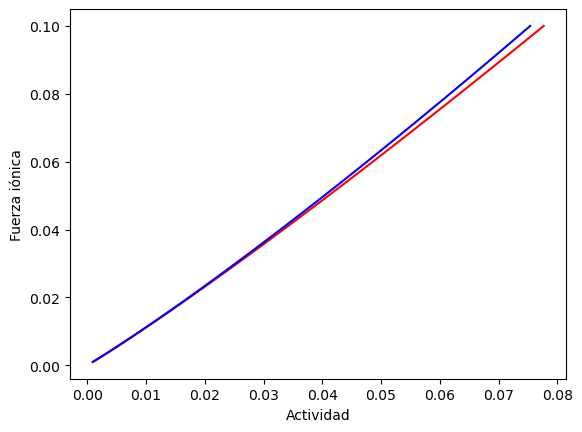

In [23]:
plt.plot(a_Na,I, color="r")
plt.plot(a_Cl,I, color="b")
plt.xlabel("Actividad")
plt.ylabel("Fuerza iónica")

Text(0, 0.5, 'Concentración iónica')

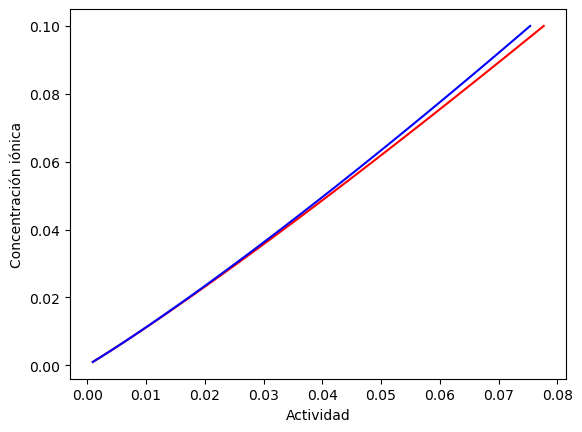

In [24]:
plt.plot(a_Na,cNa, color="r")
plt.plot(a_Cl,cCl, color="b")
plt.xlabel("Actividad")
plt.ylabel("Concentración iónica")

In [25]:
V = 1/cSal

## Evaluemos el potencial químico de una solución de sal a 25°C a diferente diferenciales de presión

In [26]:
deltaP = np.linspace(1, 1000, 10)

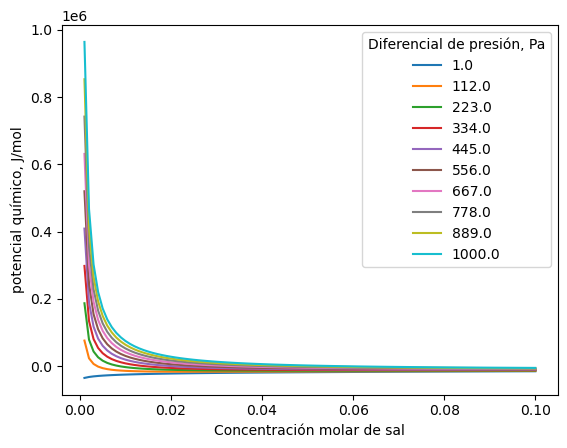

In [27]:
for i in deltaP:
    mu = R * 298 * np.log(a_Na-a_Cl)+ (V* i)
    plt.plot(cSal,mu, label= np.round(i,5))
    plt.xlabel("Concentración molar de sal")
    plt.ylabel("potencial químico, J/mol")
    plt.legend(title="Diferencial de presión, Pa")

# ecuación de permeabilidad

$J_w = A \cdot (\Delta P - \pi)$

Esta ecuación relaciona el flujo de agua permeada ($J_w$) con la presión neta aplicada ($ΔP$), la presión osmótica ($π$) y el coeficiente de permeabilidad de la membrana ($A$).

In [28]:
A_acetatoCelulosa = 0.01 # m/s Pa

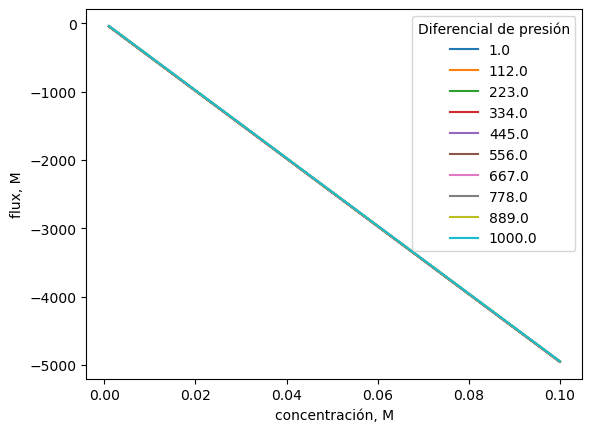

In [29]:
for i in deltaP:
    Jw = A_acetatoCelulosa* (i - (vsal*R*cSal*1000*298))
    plt.plot(cSal,Jw, label=np.round(i,3))
    plt.xlabel("concentración, M")
    plt.ylabel("flux, M")
    plt.legend(title="Diferencial de presión")

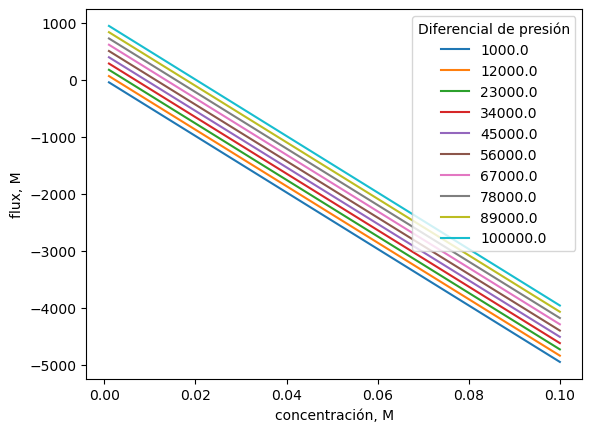

In [30]:
dP = np.linspace(1000,100000,10)
for i in dP:
    Jw = A_acetatoCelulosa* (i - (vsal*R*cSal*1000*298))
    plt.plot(cSal,Jw, label=np.round(i,3))
    plt.xlabel("concentración, M")
    plt.ylabel("flux, M")
    plt.legend(title="Diferencial de presión")

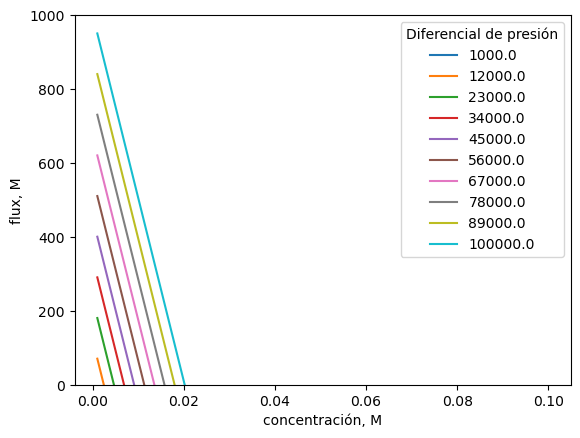

In [32]:
for i in dP:
    Jw = A_acetatoCelulosa* (i - (vsal*R*cSal*1000*298))
    plt.plot(cSal,Jw, label=np.round(i,3))
    plt.xlabel("concentración, M")
    plt.ylabel("flux, M")
    plt.ylim((0,1000))
    plt.legend(title="Diferencial de presión")